# Самостоятельный проект. Обучение с учителем: качество модели

## Введение

### Описание проекта

Интернет-магазин «В один клик» продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику и даже продукты. Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. Привлекать новых клиентов уже не так эффективно: о магазине и так знает большая часть целевой аудитории. Возможный выход — удерживать активность постоянных клиентов. Сделать это можно с помощью персонализированных предложений.

«В один клик» — современная компания, поэтому её руководство не хочет принимать решения просто так — только на основе анализа данных и бизнес-моделирования. У компании есть небольшой отдел цифровых технологий, и вам предстоит побыть в роли стажёра в этом отделе. 

Итак, вашему отделу поручили разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.

---
**Подход к решению поставленной задачи заранее сформирован заказчиком:**
1. Нужно промаркировать уровень финансовой активности постоянных покупателей. В компании принято выделять два уровня активности: **«снизилась»**, если клиент стал покупать меньше товаров, и **«прежний уровень»**.


2. Нужно собрать данные по клиентам по следующим группам:
    * Признаки, которые описывают коммуникацию сотрудников компании с клиентом.
    * Признаки, которые описывают продуктовое поведение покупателя *(например, какие товары покупает и как часто)*.
    * Признаки, которые описывают покупательское поведение клиента *(например, сколько тратил в магазине)*.
    * Признаки, которые описывают поведение покупателя на сайте *(например, как много страниц просматривает и сколько времени проводит на сайте)*.
    
В исследование нужно включить дополнительные данные финансового департамента о прибыльности клиента: какой доход каждый покупатель приносил компании за последние три месяца.

### Цели исследования:

1. Изучить имеющиеся данные и подготовить их для дальнейшего обучения моделей
2. Разработать такую модель, которая предскажет вероятность снижения покупательской активности клиента в следующие три месяца
3. Используя данные модели и данные о прибыльности клиентов, выделить сегменты покупателей и разработать для них персонализированные предложения, чтобы увеличить их покупательскую активность

### Изучим имеющиеся данные

В проекте будут использованы **четыре** датасета:

1. **`market_file.csv`** - содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении.

|Столбец                                 |Описание данных                       |
|:---------------------------------------|:-------------------------------------|
|**id**                                  |Номер покупателя в корпоративной базе данных.
|**Покупательская активность**           |Рассчитанный класс покупательской активности (целевой признак): **«снизилась»** или **«прежний уровень»**.
|**Тип сервиса**                         |Уровень сервиса, например **«премиум»** и **«стандарт»**.
|**Разрешить сообщать**                  |Информация о том, можно ли присылать покупателю дополнительные предложения о товаре<br>(согласие на это даёт покупатель).
|**Маркет_актив_6 мес**                  |Среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента.
|**Маркет_актив_тек_мес**                |Количество маркетинговых коммуникаций в текущем месяце.
|**Длительность**                        |Значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте.
|**Акционные_покупки**                   |Среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.
|**Популярная_категория**                |Самая популярная категория товаров у покупателя за последние 6 месяцев.
|**Средний_просмотр_категорий_за_визит** |Показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.
|**Неоплаченные_продукты_штук_квартал**  |Общее число неоплаченных товаров в корзине за последние 3 месяца.
|**Ошибка_сервиса**                      |Число сбоев, которые коснулись покупателя во время посещения сайта.
|**Страниц_за_визит**                    |Среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.

---
2. **`market_money.csv`** - содержит данные о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом.

|Столбец                |Описание данных                              |
|:----------------------|:--------------------------------------------|
|**id**                 |Номер покупателя в корпоративной базе данных.
|**Период**             |Название периода, во время которого зафиксирована выручка. Например, **'текущий_месяц'** или **'предыдущий_месяц'**.
|**Выручка**            |Сумма выручки за период.

---
3. **`market_time.csv`** - содержит данные о времени (в минутах), которое покупатель провёл на сайте в течение периода.

|Столбец                |Описание данных                              |
|:----------------------|:--------------------------------------------|
|**id**                 |Номер покупателя в корпоративной базе данных.
|**Период**             |Название периода, во время которого зафиксировано общее время.
|**минут**              |Значение времени, проведённого на сайте, в минутах.

---
4. **`money.csv`** - содержит данные о среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.

|Столбец                |Описание данных                              |
|:----------------------|:--------------------------------------------|
|**id**                 |Номер покупателя в корпоративной базе данных.
|**Прибыль**            |Значение прибыли.

---

### Основные этапы исследования:

1. Загрузка данных и изучение общей информации о датафреймах 
2. Предобработка данных
    * *изучение и обработка пропущенных значений*
    * *проверка соответствия типов данных*
    * *поиск и обработка явных и неявных дубликатов*
3. Исследовательский анализ данных
    * *описание данных и визуализация их распределений*
    * *поиск выбросов*
    * *отбор клиентов с положительной покупательской активностью за последние 3 месяца*
4. Объединение датафреймов и корреляционный анализ признаков итоговой таблицы
    * *поиск и при необходимости устранение мультиколлинеарности*
5. Обучение моделей с помощью пайплайнов
    * *подбор гиперпараметров*
    * *подбор подходящей метрики*
    * *выбор лучшей модели*
6. Анализ важности признаков с применением метода **SHAP**
7. Сегментация покупателей и оформление предложений по увеличению покупательской активности
8. Оформление итогового вывода исследования

---

## Импорт библиотек и собственные функции

### Установка и импорт библиотек

In [1]:
# устанавливаем библиотеку phik
!pip install phik -q

In [2]:
# устанавливаем библиотеку shap
!pip install shap -q

In [3]:
# устанавливаем библиотеку mlxtend
!pip install mlxtend -q

In [4]:
# импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap
from phik import phik_matrix
from phik.report import plot_correlation_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.dummy import DummyClassifier
from sklearn.inspection import permutation_importance
from sklearn.pipeline import Pipeline

from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import (
    OneHotEncoder, 
    OrdinalEncoder, 
    StandardScaler, 
    MinMaxScaler, 
    RobustScaler
)

from sklearn.metrics import (
    f1_score, 
    roc_auc_score, 
    accuracy_score, 
    precision_score, 
    recall_score, 
    confusion_matrix, 
    ConfusionMatrixDisplay, 
    classification_report)

from mlxtend.plotting import plot_decision_regions

### Собственные функции

In [5]:
# создадиим линии для разделения разделов и датафреймов
line_1 = '-'*127
line_2 = '_'*127

In [6]:
# собственная функция для первичного изучения данных
def data_exploration_func(df_list):
    '''
    Принимает список датафреймов и, перебирая каждый датафрейм в цикле,
    выводит основную информацию о них, необходимую для первичного обзора данных.
    
    Args:
        df_list (class 'list'): список датафреймов, элементам необходимо предварительно задать имена
        df_current (class 'pandas.core.frame.DataFrame'): каждый отдельный датафрейм из списка
        
    Returns:
        head(10) - вывод первых 10 строк датафрейма
        shape - вывод размерности датафрейма
        info() - вывод основной информации о датафрейме
        describe(include='all') - вывод описательной статистики датафрейма    
    '''
    for df_current in df_list:
        print(f'Изучение данных датафрейма "{df_current.name}"\n')
        print(f'Первые 10 строк "{df_current.name}"')
        display(df_current.head(10))
        print(line_1)
        print(f'"{df_current.name}" состоит из:')
        print(f'{df_current.shape[0]} строк')
        print(f'{df_current.shape[1]} столбцов')
        print(line_1)
        print(f'Общая информация о "{df_current.name}"\n')
        df_current.info()
        print(line_1)
        print(f'Описательная статистика "{df_current.name}"')
        display(df_current.describe(include='all').T)
        print(f'{line_2}\n')

In [7]:
# собственная функция для анализа числовых признаков
def hist_box_func(data):
    '''
    Принимает переменную, содержащую столбцы с числовыми данными.
    Если столбцов больше одного, то применять через цикл, перебирая 
    каждый столбец данной функцией в теле цикла.
    
    Args:
        data (class 'pandas.core.frame.DataFrame', class 'pandas.core.series.Series') - переменная с числовыми столбцами
        
    Returns:
        hist() - вывод гистограммы с распределением наблюдений в столбце
        boxplot() - вывод ящика с усами
        describe() - вывод описательной статистики столбца
    '''
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    plt.subplot(1,2,1)
    plt.hist(data, bins=30, ec='black', lw=1, color='khaki')
    plt.title('Распределение', size=15)
    plt.ylabel('Частота', size=12)
    plt.grid(linestyle='dashed')
    plt.subplot(1,2,2)
    plt.boxplot(data, vert=False)
    plt.title('Ящик с усами', size=15)
    plt.grid(linestyle='dashed')
    plt.show()
    print('Описательная статистика:')
    print(data.describe())

In [8]:
# задаём палитру цветов
colors = sns.color_palette('deep')

# собственная функция для визуализации категориальных признаков
def cat_func(data):
    '''
    Принимает переменную, содержащую столбцы с категориальными данными.
    Предварительно необходимо создать переменную colors с палитрой цветов.
    
    Args:
        data (class 'pandas.core.frame.DataFrame', class 'pandas.core.series.Series') - переменная категориальными столбцами

    Returns:
        barh - столбчатая диаграмма
        pie - круговая диаграмма
    '''   
    print()
    print(data.value_counts())
    data.value_counts(ascending=True).plot(kind='barh', 
                             color='cornflowerblue', 
                             alpha=0.8)
    plt.title('Столбчатая диаграмма', size=15)
    plt.xticks(rotation=0)
    plt.xlabel('Количество', size=12)
    plt.ylabel('Значения', size=12)
    plt.show()
    print(line_1)
    data.value_counts().plot(kind='pie', 
                             legend=True, 
                             autopct='%.2f%%', 
                             textprops={'color':'white', 'size':15}, 
                             figsize=(8, 6), colors=colors)
    plt.legend(bbox_to_anchor=(1, 1), prop={'size': 15})
    plt.title('Круговая диаграмма', size=15)
    plt.ylabel(None)
    plt.show()
    print(line_2)

In [9]:
# собственная функция для преобразования категориального признака с двумя значениями в числовой бинарный признак
def to_binary_func(value):
    '''
    Принимает отдельный столбец из фрейма данных, содержащий категориальные значения.
    Предварительно необходимо задать переменные: 
    cat_value_one (будет преобразовано в 1), 
    cat_value_two (будет преобразовано в 0), 
    и сохранить в них категориальные значения исходного pandas.Series.
    
    Args:
        value (pandas.core.series.Series) - переменная с категориальными значениями

    Returns:
        Столбец с преобразованными значениями (0, 1)
    '''  
    try:
        if value == cat_value_one:
            return 1
        elif value == cat_value_two:
            return 0
    except:
        return 'Error'

In [10]:
# собственная функция для преобразования числового бинарного признака в бинарный категориальный
def to_cat_func(value):
    '''
    Принимает отдельный столбец из фрейма данных, содержащий числовой бинарный признак.
    Предварительно необходимо задать категориальные переменные: 
    cat_value_one (на что будет преобразована 1), 
    cat_value_two (на что будет преобразован 0).
    
    Args:
        value (pandas.core.series.Series) - переменная с числовыми значениями

    Returns:
        Столбец с преобразованными значениями (cat_value_one, cat_value_two)
    '''  
    try:
        if value == 1:
            return cat_value_one
        elif value == 0:
            return cat_value_two
    except:
        return 'Error'

## Шаг 1. Загрузка и обзор данных

### Загрузка файлов

In [11]:
# загружаем данные и сохраняем в переменные
try:
    df_market_file = pd.read_csv('/datasets/market_file.csv', sep=',', decimal='.')
    df_market_money = pd.read_csv('/datasets/market_money.csv', sep=',', decimal='.')
    df_market_time = pd.read_csv('/datasets/market_time.csv', sep=',', decimal='.')
    df_money = pd.read_csv('/datasets/money.csv', sep=';', decimal=',')
except:
    df_market_file = pd.read_csv('https://code.s3.yandex.net/datasets/market_file.csv', sep=',', decimal='.')
    df_market_money = pd.read_csv('https://code.s3.yandex.net/datasets/market_money.csv', sep=',', decimal='.')
    df_market_time = pd.read_csv('https://code.s3.yandex.net/datasets/market_time.csv', sep=',', decimal='.')
    df_money = pd.read_csv('https://code.s3.yandex.net/datasets/money.csv', sep=';', decimal=',')

In [12]:
# настраиваем отображение таблиц
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

### Обзор данных

In [13]:
# изучим данные с помощью собственной функции
# зададим датафреймам имена
df_market_file.name = 'df_market_file'
df_market_money.name = 'df_market_money'
df_market_time.name = 'df_market_time'
df_money.name = 'df_money'

# создадим список из имеющихся датафреймов
df_list = [df_market_file, df_market_money, df_market_time, df_money]

# применяем функцию к имеющимся датафреймам       
data_exploration_func(df_list)

Изучение данных датафрейма "df_market_file"

Первые 10 строк "df_market_file"


id Покупательская активность Тип сервиса Разрешить сообщать  \
0  215348                 Снизилась     премиум                 да   
1  215349                 Снизилась     премиум                 да   
2  215350                 Снизилась   стандартт                нет   
3  215351                 Снизилась   стандартт                 да   
4  215352                 Снизилась   стандартт                нет   
5  215353                 Снизилась   стандартт                 да   
6  215354                 Снизилась   стандартт                 да   
7  215355                 Снизилась   стандартт                нет   
8  215356                 Снизилась   стандартт                 да   
9  215357                 Снизилась   стандартт                 да   

   Маркет_актив_6_мес  Маркет_актив_тек_мес  Длительность  Акционные_покупки  \
0                 3.4                     5           121               0.00   
1                 4.4                     4           819               0.75   
2                 4.9                     3           539               0.14   
3                 3.2                     5           896               0.99   
4                 5.1                     3          1064               0.94   
5                 3.3                     4           762               0.26   
6                 5.1                     3           431               0.23   
7                 4.7                     4           284               0.17   
8                 4.2                     4           192               0.14   
9                 3.9                     5           154               0.00   

             Популярная_категория  Средний_просмотр_категорий_за_визит  \
0                Товары для детей                                    6   
1                Товары для детей                                    4   
2               Домашний текстиль                                    5   
3                Товары для детей                                    5   
4                Товары для детей                                    3   
5               Домашний текстиль                                    4   
6           Косметика и аксесуары                                    2   
7                Товары для детей                                    5   
8           Косметика и аксесуары                                    2   
9  Техника для красоты и здоровья                                    3   

   Неоплаченные_продукты_штук_квартал  Ошибка_сервиса  Страниц_за_визит  
0                                   2               1                 5  
1                                   4               2                 5  
2                                   2               1                 5  
3                                   0               6                 4  
4                                   2               3                 2  
5                                   1               1                 4  
6                                   3               7                 2  
7                                   1               6                 4  
8                                   2               1                 3  
9                                   3               9                 5

-------------------------------------------------------------------------------------------------------------------------------
"df_market_file" состоит из:
1300 строк
13 столбцов
-------------------------------------------------------------------------------------------------------------------------------
Общая информация о "df_market_file"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность   

count unique               top freq  \
id                                   1300.0    NaN               NaN  NaN   
Покупательская активность              1300      2   Прежний уровень  802   
Тип сервиса                            1300      3          стандарт  914   
Разрешить сообщать                     1300      2                да  962   
Маркет_актив_6_мес                   1300.0    NaN               NaN  NaN   
Маркет_актив_тек_мес                 1300.0    NaN               NaN  NaN   
Длительность                         1300.0    NaN               NaN  NaN   
Акционные_покупки                    1300.0    NaN               NaN  NaN   
Популярная_категория                   1300      6  Товары для детей  330   
Средний_просмотр_категорий_за_визит  1300.0    NaN               NaN  NaN   
Неоплаченные_продукты_штук_квартал   1300.0    NaN               NaN  NaN   
Ошибка_сервиса                       1300.0    NaN               NaN  NaN   
Страниц_за_визит                     1300.0    NaN               NaN  NaN   

                                           mean         std       min  \
id                                     215997.5  375.421985  215348.0   
Покупательская активность                   NaN         NaN       NaN   
Тип сервиса                                 NaN         NaN       NaN   
Разрешить сообщать                          NaN         NaN       NaN   
Маркет_актив_6_мес                     4.253769    1.014814       0.9   
Маркет_актив_тек_мес                   4.011538    0.696868       3.0   
Длительность                         601.898462  249.856289     110.0   
Акционные_покупки                      0.319808    0.249843       0.0   
Популярная_категория                        NaN         NaN       NaN   
Средний_просмотр_категорий_за_визит        3.27     1.35535       1.0   
Неоплаченные_продукты_штук_квартал         2.84    1.971451       0.0   
Ошибка_сервиса                         4.185385    1.955298       0.0   
Страниц_за_визит                       8.176923    3.978126       1.0   

                                           25%       50%        75%       max  
id                                   215672.75  215997.5  216322.25  216647.0  
Покупательская активность                  NaN       NaN        NaN       NaN  
Тип сервиса                                NaN       NaN        NaN       NaN  
Разрешить сообщать                         NaN       NaN        NaN       NaN  
Маркет_актив_6_мес                         3.7       4.2        4.9       6.6  
Маркет_актив_тек_мес                       4.0       4.0        4.0       5.0  
Длительность                             405.5     606.0      806.0    1079.0  
Акционные_покупки                         0.17      0.24        0.3      0.99  
Популярная_категория                       NaN       NaN        NaN       NaN  
Средний_просмотр_категорий_за_визит        2.0       3.0        4.0       6.0  
Неоплаченные_продукты_штук_квартал         1.0       3.0        4.0      10.0  
Ошибка_сервиса                             3.0       4.0        6.0       9.0  
Страниц_за_визит                           5.0       8.0       11.0      20.0

_______________________________________________________________________________________________________________________________

Изучение данных датафрейма "df_market_money"

Первые 10 строк "df_market_money"


id               Период  Выручка
0  215348  препредыдущий_месяц      0.0
1  215348        текущий_месяц   3293.1
2  215348     предыдущий_месяц      0.0
3  215349  препредыдущий_месяц   4472.0
4  215349        текущий_месяц   4971.6
5  215349     предыдущий_месяц   5216.0
6  215350  препредыдущий_месяц   4826.0
7  215350        текущий_месяц   5058.4
8  215350     предыдущий_месяц   5457.5
9  215351        текущий_месяц   6610.4

-------------------------------------------------------------------------------------------------------------------------------
"df_market_money" состоит из:
3900 строк
3 столбцов
-------------------------------------------------------------------------------------------------------------------------------
Общая информация о "df_market_money"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB
-------------------------------------------------------------------------------------------------------------------------------
Описательная статистика "df_market_money"


count unique               top  freq         mean          std  \
id       3900.0    NaN               NaN   NaN     215997.5   375.325686   
Период     3900      3  предыдущий_месяц  1300          NaN          NaN   
Выручка  3900.0    NaN               NaN   NaN  5025.696051  1777.704104   

              min        25%       50%        75%       max  
id       215348.0  215672.75  215997.5  216322.25  216647.0  
Период        NaN        NaN       NaN        NaN       NaN  
Выручка       0.0    4590.15    4957.5     5363.0  106862.2

_______________________________________________________________________________________________________________________________

Изучение данных датафрейма "df_market_time"

Первые 10 строк "df_market_time"


id            Период  минут
0  215348     текущий_месяц     14
1  215348  предыдцщий_месяц     13
2  215349     текущий_месяц     10
3  215349  предыдцщий_месяц     12
4  215350     текущий_месяц     13
5  215350  предыдцщий_месяц      8
6  215351     текущий_месяц     13
7  215351  предыдцщий_месяц     11
8  215352     текущий_месяц     11
9  215352  предыдцщий_месяц      8

-------------------------------------------------------------------------------------------------------------------------------
"df_market_time" состоит из:
2600 строк
3 столбцов
-------------------------------------------------------------------------------------------------------------------------------
Общая информация о "df_market_time"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB
-------------------------------------------------------------------------------------------------------------------------------
Описательная статистика "df_market_time"


count unique               top  freq       mean         std  \
id      2600.0    NaN               NaN   NaN   215997.5  375.349754   
Период    2600      2  предыдцщий_месяц  1300        NaN         NaN   
минут   2600.0    NaN               NaN   NaN  13.336154    4.080198   

             min        25%       50%        75%       max  
id      215348.0  215672.75  215997.5  216322.25  216647.0  
Период       NaN        NaN       NaN        NaN       NaN  
минут        4.0       10.0      13.0       16.0      23.0

_______________________________________________________________________________________________________________________________

Изучение данных датафрейма "df_money"

Первые 10 строк "df_money"


id  Прибыль
0  215348     0.98
1  215349     4.16
2  215350     3.13
3  215351     4.87
4  215352     4.21
5  215353     3.95
6  215354     3.62
7  215355     5.26
8  215356     4.93
9  215357     4.66

-------------------------------------------------------------------------------------------------------------------------------
"df_money" состоит из:
1300 строк
2 столбцов
-------------------------------------------------------------------------------------------------------------------------------
Общая информация о "df_money"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB
-------------------------------------------------------------------------------------------------------------------------------
Описательная статистика "df_money"


count           mean         std        min        25%         50%  \
id       1300.0  215997.500000  375.421985  215348.00  215672.75  215997.500   
Прибыль  1300.0       3.996631    1.013722       0.86       3.30       4.045   

               75%        max  
id       216322.25  216647.00  
Прибыль       4.67       7.43

_______________________________________________________________________________________________________________________________



Судя по количеству строк в столбце **`id`**, у нас **1300** уникальных покупателей.  

Названия столбцов стоит привести к единому виду и стилю. Сейчас некоторые столбцы названы с заглавной буквы, некоторые - со строчной.  
В некоторых столбцах разделителем в названиях выступают пробелы, а некоторые названы с использованием "змеиного" регистра.

Также можно заметить в данных такие ошибки как:
* в **`df_market_file`** встречаются такие значения как:
    * **"Косметика и аксесуары"** - пропущена вторая буква **"с"** в слове **"аксессуары"**
    * **"стандартт"** - двойная буква **т**
* в **`df_market_time`** встречаются такие значения как **"предыдцщий_месяц"**

Данные недочёты будем исправлять на этапе **предобработки данных**.

---
Изучим распределения для всех столбцов с типом данных ***int*** и ***float***, то есть с числовыми данными.  
Столбец **`id`** не берём, так как это индивидуальный идентификатор каждого покупателя.

In [14]:
# выведем на экран названия всех имеющихся датафреймов
print('Датафреймы для анализа распределений\nчисловых признаков:\n')
for df in df_list:
    print(df.name)

Датафреймы для анализа распределений
числовых признаков:

df_market_file
df_market_money
df_market_time
df_money


---
**Распределения данных для числовых столбцов `df_market_file`**

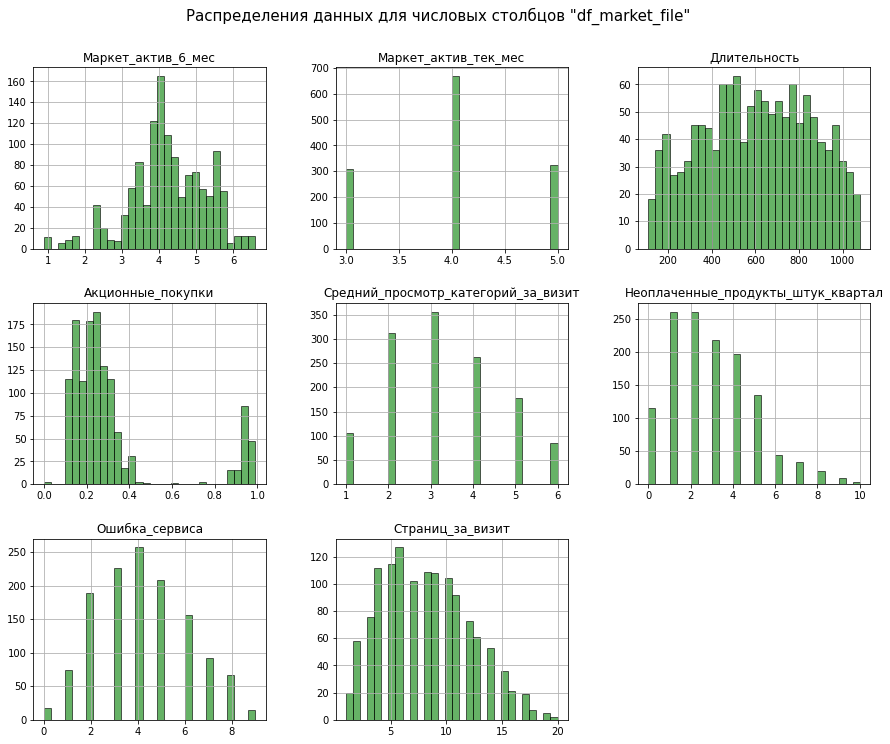

In [15]:
# выведем на экран гистограмму для всех числовых столбцов df_market_file
df_market_file.drop('id', axis=1).hist(figsize=(15, 12), ec='black', alpha=0.6, lw=1, color='g', bins=30)
plt.suptitle('Распределения данных для числовых столбцов "df_market_file"', size=15, y=0.95);

Большинство распределений похожи на **нормальные**, за исключением признаков:
* **Маркет_актив_тек_мес** - тут наблюдения распределяются только на *три варианта (**3, 4 и 5**)*;
* **Акционные_покупки** - *бимодальное* распределение.

---
**Распределения данных для числовых столбцов `df_market_money`**

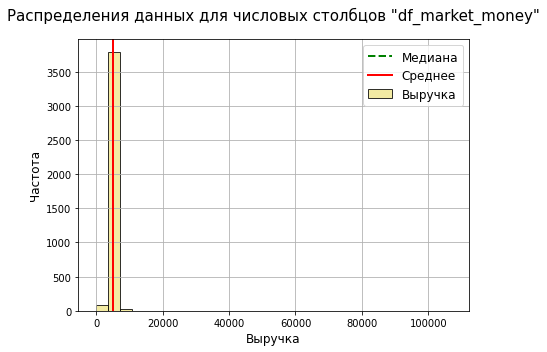

In [16]:
# выведем на экран гистограмму для всех числовых столбцов df_market_money
df_market_money.drop('id', axis=1).hist(figsize=(7, 5), ec='black', alpha=0.8, lw=1, color='khaki', bins=30)
plt.title('Распределения данных для числовых столбцов "df_market_money"', size=15, y=1.05)
plt.axvline(df_market_money['Выручка'].median(), color='g', linestyle='dashed', linewidth=2)
plt.axvline(df_market_money['Выручка'].mean(), color='r', linestyle='-', linewidth=2)
plt.legend(['Медиана', 'Среднее', 'Выручка'], prop={'size': 12})
plt.xlabel('Выручка', size=12)
plt.ylabel('Частота', size=12);

Гистограмма в таком виде не информативна. Полагаю, что это связано с с аномально большим максимальным значением выручки.  
Как мы увидели из **`describe()`**, **max** равняется **106862.2**. Проверим на **"ящике с усами"** и попробуем изучить распределение по выручке подробнее.

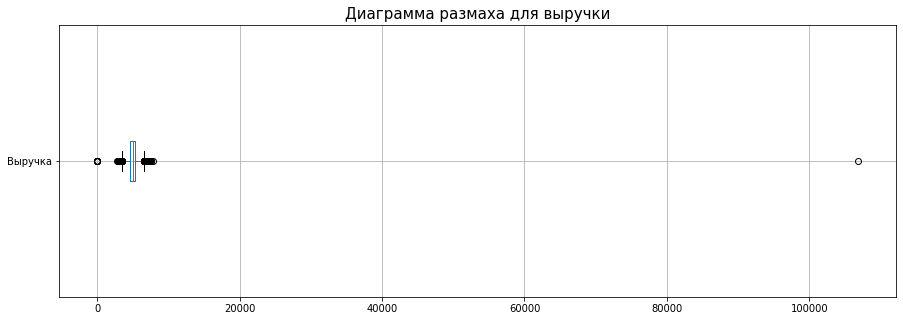

In [17]:
# построим диаграмму размаха для 'Выручка' (без учета выброса)
df_market_money.boxplot(column=['Выручка'], figsize=(15,5), grid=True, vert=False)
plt.title('Диаграмма размаха для выручки', size=15);

Видим как минимум **два аномальных значения**: **0.0** и выше 100000, а точнее, как нам стало известно ранее, **106862.2**. 

Выбросы это или нет, сейчас рано судить. За рассматриваемый период покупатель мог как не совершать покупки вообще, так и совершить несколько нестандартных крупных покупок.  

Тем не менее, из-за этих двух значений имеем слишком мелкий масштаб на гистограмме.  
Попробуем посмотреть на распределение наблюдений без этих двух значений.

In [18]:
# выведем строки с аномальными значениями выручки
df_market_money.query('Выручка == 106862.2 or Выручка == 0')

id               Период   Выручка
0   215348  препредыдущий_месяц       0.0
2   215348     предыдущий_месяц       0.0
28  215357  препредыдущий_месяц       0.0
29  215357     предыдущий_месяц       0.0
34  215359     предыдущий_месяц       0.0
35  215359  препредыдущий_месяц       0.0
98  215380        текущий_месяц  106862.2

Видим, что **4** пользователя ведут себя не совсем стандартно.  
Изучим выручки от них за разные периоды.

In [19]:
# выводим на экран данные за разные периоды для пользователей с подозрительными выручками
df_market_money.query('id == 215348 or id == 215357 or id == 215359 or id == 215380')

id               Период   Выручка
0   215348  препредыдущий_месяц       0.0
1   215348        текущий_месяц    3293.1
2   215348     предыдущий_месяц       0.0
27  215357        текущий_месяц    5986.3
28  215357  препредыдущий_месяц       0.0
29  215357     предыдущий_месяц       0.0
33  215359        текущий_месяц    4735.0
34  215359     предыдущий_месяц       0.0
35  215359  препредыдущий_месяц       0.0
96  215380  препредыдущий_месяц    5051.0
97  215380     предыдущий_месяц    6077.0
98  215380        текущий_месяц  106862.2

Пользователи с **id 215348, 215357** и **215359** начали совершать покупки на сайте «В один клик» только в текущем месяце.  
Тому могло быть несколько причин:
- это могут быть новые пользователи
- этих пользователей могла одновременно привлечь в текущем месяца какая-нибудь акция
- просто так совпало, этим пользователям не свойственно делать покупки каждый месяц либо у них отсутсвтует такая потребность

В целом, в этом нет ничего странного.

**id 215380** - этот пользователь, наоборот, показывает активность каждый месяц. Однако в текущем месяце выручка с данного пользователя более чем в **19 раз выше**, чем средняя за предыдущие периоды. Выглядит подозрительно.

Медиана: 4957.5
Среднее: 5025.696


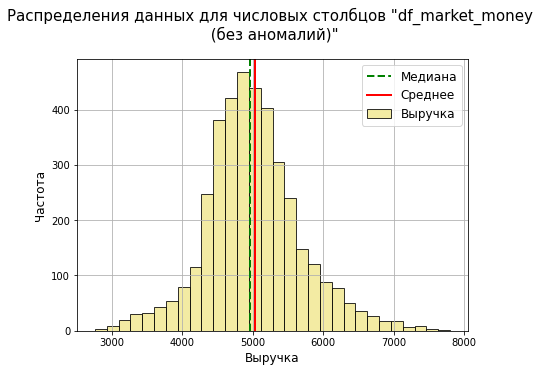

In [20]:
# снова построим гистограмму для выручки, но уже без аномальных значений 0.0 и 106862.2
(df_market_money
 .query('0 < Выручка < 106862.0')
 .drop('id', axis=1)
 .hist(
     figsize=(7, 5), 
     ec='black', 
     alpha=0.8, 
     lw=1, 
     color='khaki', 
     bins=30, 
     legend=True)
)
plt.title('Распределения данных для числовых столбцов "df_market_money \n (без аномалий)"', size=15, y=1.05)
plt.axvline(df_market_money['Выручка'].median(), color='g', linestyle='dashed', linewidth=2)
plt.axvline(df_market_money['Выручка'].mean(), color='r', linestyle='-', linewidth=2)
plt.legend(['Медиана', 'Среднее', 'Выручка'], prop={'size': 12})
plt.xlabel('Выручка', size=12)
plt.ylabel('Частота', size=12);


# выводим на экран медиану и среднее
print('Медиана:', round(df_market_money['Выручка'].median(), 3))
print('Среднее:', round(df_market_money['Выручка'].mean(), 3))

Наблюдаем **нормальное** распределение наблюдений.

**Медиана:** 4957.5  
**Среднее:** 5025.7

---
**Распределения данных для числовых столбцов `df_market_time`**

Медиана: 13.0
Среднее: 13.336


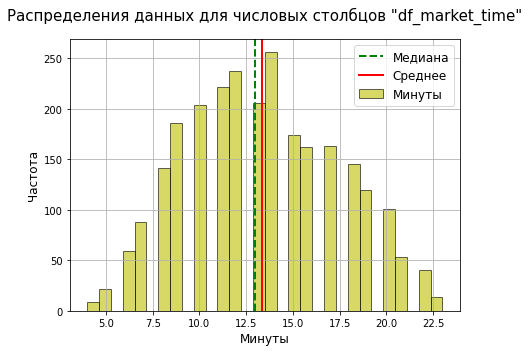

In [21]:
# выведем на экран гистограмму для всех числовых столбцов df_market_time
(df_market_time
 .drop('id', axis=1)
 .hist(
     figsize=(7, 5), 
     ec='black', 
     alpha=0.6, 
     lw=1, 
     color='y', 
     bins=30, 
     legend=True)
)
plt.title('Распределения данных для числовых столбцов "df_market_time"', size=15, y=1.05)
plt.axvline(df_market_time['минут'].median(), color='g', linestyle='dashed', linewidth=2)
plt.axvline(df_market_time['минут'].mean(), color='r', linestyle='-', linewidth=2)
plt.legend(['Медиана', 'Среднее', 'Минуты'], prop={'size': 12})
plt.xlabel('Минуты', size=12)
plt.ylabel('Частота', size=12);

# выводим на экран медиану и среднее
print('Медиана:', round(df_market_time['минут'].median(), 3))
print('Среднее:', round(df_market_time['минут'].mean(), 3))

Наблюдаем **нормальное** распределение наблюдений.

**Медиана:** 13.0  
**Среднее:** 13.34

---
**Распределения данных для числовых столбцов `df_money`**

Медиана: 4.045
Среднее: 3.997


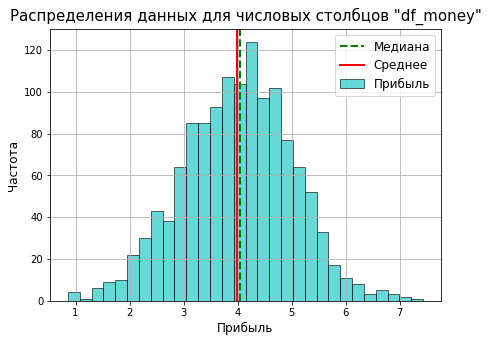

In [22]:
# выведем на экран гистограмму для всех числовых столбцов df_money
df_money.drop('id', axis=1).hist(figsize=(7, 5), ec='black', alpha=0.6, lw=1, color='c', bins=30, legend=True)
plt.title('Распределения данных для числовых столбцов "df_money"', size=15, y=1.01)
plt.axvline(df_money['Прибыль'].median(), color='g', linestyle='dashed', linewidth=2)
plt.axvline(df_money['Прибыль'].mean(), color='r', linestyle='-', linewidth=2)
plt.legend(['Медиана', 'Среднее', 'Прибыль'], prop={'size': 12})
plt.xlabel('Прибыль', size=12)
plt.ylabel('Частота', size=12);

# выводим на экран медиану и среднее
print('Медиана:', round(df_money['Прибыль'].median(), 3))
print('Среднее:', round(df_money['Прибыль'].mean(), 3))

Наблюдаем **нормальное** распределение наблюдений.

**Медиана:** 4.045  
**Среднее:** 3.997

### Вывод по обзору данных:

Изучили общую информацию и распределения числовых признаков в датафреймах с данными:
* **df_market_file** - о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении;
* **df_market_money** - о выручке, которую получает магазин с покупателя (сколько покупатель всего потратил за период взаимодействия с сайтом);
* **df_market_time** - о времени (в минутах), которое покупатель провёл на сайте в течение периода;
* **df_money** - о среднемесячной прибыли покупателя за последние 3 месяца (какую прибыль получает магазин от продаж каждому покупателю).

---
Количество строк и столбцов в имеющихся датафреймах:

|Датафрейм           |Строки |Столбцы |
|:-------------------|:-----:|:------:|
|**df_market_file**  |1300   |13      |
|**df_market_money** |3900   |3       |
|**df_market_time**  |2600   |3       |
|**df_money**        |1300   |2       |

Данные в таблицах соответствуют своему описанию.  
Были обнаружены незначиетльные ошибки и недочёты, которые будут исправлены на этапе предобработки.

---

## Шаг 2. Предобработка данных

### Обработка столбцов и приведение их к единому стилю

In [23]:
# выведем на экран текущие названия столбцов каждого датафрейма
for df_current in df_list:
    print(f'Столбцы "{df_current.name}":\n')
    for i in df_current:
        print(i)
    print(f'{line_2}\n')

Столбцы "df_market_file":

id
Покупательская активность
Тип сервиса
Разрешить сообщать
Маркет_актив_6_мес
Маркет_актив_тек_мес
Длительность
Акционные_покупки
Популярная_категория
Средний_просмотр_категорий_за_визит
Неоплаченные_продукты_штук_квартал
Ошибка_сервиса
Страниц_за_визит
_______________________________________________________________________________________________________________________________

Столбцы "df_market_money":

id
Период
Выручка
_______________________________________________________________________________________________________________________________

Столбцы "df_market_time":

id
Период
минут
_______________________________________________________________________________________________________________________________

Столбцы "df_money":

id
Прибыль
_______________________________________________________________________________________________________________________________



**Выводы по названиям столбцов:**
* названия столбцов **`id`** в датафреймах имеют язык, отличный от языка названий остальных столбцов
* названия столбцов содержат пробелы
* почти все названия столбцов начинаются с заглавной буквы

Переименовывать **id** на русский язык нецелесообразно, так же как и переименовывать остальные столбцы на английский.  
Из-за столбцов с именами **id** проблем и путаницы возникнуть не должно. С точки зрения языков проще оставить всё как есть.

Избавимся от пробелов и приведём названия всех столбцов к единому стилю.

In [24]:
# с помощью цикла переведём названия всех столбцов во всех дата фреймах к нижнему регистру
# и избавимся от пробелов
for df in df_list:
    df.columns = [x.lower() for x in df.columns]
    df.columns = [x.replace(' ', '_') for x in df.columns]
    
# проверяем названия столбцов после преобразований
for df_current in df_list:
    print(f'Столбцы "{df_current.name}" после изменений:\n')
    for i in df_current:
        print(i)
    print(f'{line_2}\n')

Столбцы "df_market_file" после изменений:

id
покупательская_активность
тип_сервиса
разрешить_сообщать
маркет_актив_6_мес
маркет_актив_тек_мес
длительность
акционные_покупки
популярная_категория
средний_просмотр_категорий_за_визит
неоплаченные_продукты_штук_квартал
ошибка_сервиса
страниц_за_визит
_______________________________________________________________________________________________________________________________

Столбцы "df_market_money" после изменений:

id
период
выручка
_______________________________________________________________________________________________________________________________

Столбцы "df_market_time" после изменений:

id
период
минут
_______________________________________________________________________________________________________________________________

Столбцы "df_money" после изменений:

id
прибыль
_______________________________________________________________________________________________________________________________



Столбцы во всех датафреймах приведены к единому стилю.

### Поиск пропущенных значений

In [25]:
# спомощью цикла првоерим датафреймына наличие пропусков
for df in df_list:
    print(f'Пропущенные значения "{df.name}":\n{df.isna().sum()}')
    print(line_1)

Пропущенные значения "df_market_file":
id                                     0
покупательская_активность              0
тип_сервиса                            0
разрешить_сообщать                     0
маркет_актив_6_мес                     0
маркет_актив_тек_мес                   0
длительность                           0
акционные_покупки                      0
популярная_категория                   0
средний_просмотр_категорий_за_визит    0
неоплаченные_продукты_штук_квартал     0
ошибка_сервиса                         0
страниц_за_визит                       0
dtype: int64
-------------------------------------------------------------------------------------------------------------------------------
Пропущенные значения "df_market_money":
id         0
период     0
выручка    0
dtype: int64
-------------------------------------------------------------------------------------------------------------------------------
Пропущенные значения "df_market_time":
id        0
период    0
мину

Пропуски отсутствуют.

### Проверка типов данных

In [26]:
# спомощью цикла првоерим типы данных во всех датафреймах
for df in df_list:
    print(f'Типы данных датафрейма "{df.name}"\n')
    print(df.dtypes)
    print(line_1)

Типы данных датафрейма "df_market_file"

id                                       int64
покупательская_активность               object
тип_сервиса                             object
разрешить_сообщать                      object
маркет_актив_6_мес                     float64
маркет_актив_тек_мес                     int64
длительность                             int64
акционные_покупки                      float64
популярная_категория                    object
средний_просмотр_категорий_за_визит      int64
неоплаченные_продукты_штук_квартал       int64
ошибка_сервиса                           int64
страниц_за_визит                         int64
dtype: object
-------------------------------------------------------------------------------------------------------------------------------
Типы данных датафрейма "df_market_money"

id           int64
период      object
выручка    float64
dtype: object
---------------------------------------------------------------------------------------------

In [27]:
# для наглядности выведем на экран по три первых строки каждого датафрейма
for df in df_list:
    display(df.head(3))

id покупательская_активность тип_сервиса разрешить_сообщать  \
0  215348                 Снизилась     премиум                 да   
1  215349                 Снизилась     премиум                 да   
2  215350                 Снизилась   стандартт                нет   

   маркет_актив_6_мес  маркет_актив_тек_мес  длительность  акционные_покупки  \
0                 3.4                     5           121               0.00   
1                 4.4                     4           819               0.75   
2                 4.9                     3           539               0.14   

  популярная_категория  средний_просмотр_категорий_за_визит  \
0     Товары для детей                                    6   
1     Товары для детей                                    4   
2    Домашний текстиль                                    5   

   неоплаченные_продукты_штук_квартал  ошибка_сервиса  страниц_за_визит  
0                                   2               1                 5  
1                                   4               2                 5  
2                                   2               1                 5

id               период  выручка
0  215348  препредыдущий_месяц      0.0
1  215348        текущий_месяц   3293.1
2  215348     предыдущий_месяц      0.0

id            период  минут
0  215348     текущий_месяц     14
1  215348  предыдцщий_месяц     13
2  215349     текущий_месяц     10

id  прибыль
0  215348     0.98
1  215349     4.16
2  215350     3.13

**Вывод по типам данных:**
* **`df_market_file`** - данные соответствуют своему типу;
* **`df_market_money`** - данные соответствуют своему типу;
* **`df_market_time`** - данные соответствуют своему типу;
* **`df_money`** - данные соответствуют своему типу.

---

### Поиск явных дубликатов

In [28]:
# спомощью цикла проверим все датафреймы на наличие полных дубликатов
for df in df_list:
    print(f'Явных дубликатов в "{df.name}": {df.duplicated().sum()}')

Явных дубликатов в "df_market_file": 0
Явных дубликатов в "df_market_money": 0
Явных дубликатов в "df_market_time": 0
Явных дубликатов в "df_money": 0


Полные дубликаты не обнаружены.

### Поиск неявных дубликатов

#### Изучим уникальные значения `df_market_file`

In [29]:
# с помощью цикла проверим уникальные значения категориальных столбцов df_market_file
print('Проверка уникальных значений категориальных столбцов "df_market_file"\n')
for col in df_market_file[df_market_file.select_dtypes(exclude='number').columns]:
    print(f'Уникальные значения столбца "{col}":\n')
    print(f'{df_market_file[col].value_counts()}\n')
    print(f'Количество уникальных значений столбца "{col}": {len(df_market_file[col].unique())}')
    print(line_1)

# отдельно проверим столбец 'id'    
print('\nКоличество уникальных значений столбца "id":', len(df_market_file['id'].unique()))

Проверка уникальных значений категориальных столбцов "df_market_file"

Уникальные значения столбца "покупательская_активность":

Прежний уровень    802
Снизилась          498
Name: покупательская_активность, dtype: int64

Количество уникальных значений столбца "покупательская_активность": 2
-------------------------------------------------------------------------------------------------------------------------------
Уникальные значения столбца "тип_сервиса":

стандарт     914
премиум      376
стандартт     10
Name: тип_сервиса, dtype: int64

Количество уникальных значений столбца "тип_сервиса": 3
-------------------------------------------------------------------------------------------------------------------------------
Уникальные значения столбца "разрешить_сообщать":

да     962
нет    338
Name: разрешить_сообщать, dtype: int64

Количество уникальных значений столбца "разрешить_сообщать": 2
--------------------------------------------------------------------------------------------

- В столбце **`тип_сервиса`** **10** строк содержат значение **`стандартт`**. Очевидно, что это ошибка при вводе данных, и на их местах должны стоять значения **`стандарт`**.

- Категория **`Косметика и аксесуары`** в столбце **`популярная_категория`** написана неправильно. Должно быть **`Косметика и аксессуары`**.

In [30]:
# переименовываем отдельные значения столбцов 'тип_сервиса' и 'популярная_категория'
df_market_file['тип_сервиса'] = df_market_file['тип_сервиса'].str.replace('стандартт', 'стандарт')
df_market_file['популярная_категория'] = df_market_file['популярная_категория'].str.replace('Косметика и аксесуары', 
                                                                                            'Косметика и аксессуары')

# проверяем 
print('Столбец "тип_сервиса":')
print(df_market_file['тип_сервиса'].value_counts())
print()
print('Столбец "популярная_категория":')
print(df_market_file['популярная_категория'].value_counts())

Столбец "тип_сервиса":
стандарт    924
премиум     376
Name: тип_сервиса, dtype: int64

Столбец "популярная_категория":
Товары для детей                        330
Домашний текстиль                       251
Косметика и аксессуары                  223
Техника для красоты и здоровья          184
Мелкая бытовая техника и электроника    174
Кухонная посуда                         138
Name: популярная_категория, dtype: int64


Неявные дубликаты и ошибки устранены.  
Столбец **`id`** содержит 1300 уникальных значений, что равняется количеству уникальных пользователей сайта.

#### Изучим уникальные значения `df_market_money`

In [31]:
# выведем на экран типы данных в столбцах df_market_money
print(f'Типы данных столбцов "df_market_money":\n{df_market_money.dtypes}\n{line_1}\n')

# с помощью цикла проверим уникальные значения категориальных столбцов df_market_money
print('Проверка уникальных значений категориальных столбцов "df_market_money"\n')
for col in df_market_money[df_market_money.select_dtypes(exclude='number').columns]:
    print(f'Уникальные значения столбца "{col}":\n')
    print(f'{df_market_money[col].value_counts()}\n')
    print(f'Количество уникальных значений столбца "{col}": {len(df_market_money[col].unique())}')
    print(line_1)

# отдельно проверим столбец 'id'    
print('\nКоличество уникальных значений столбца "id":', len(df_market_money['id'].unique()))

Типы данных столбцов "df_market_money":
id           int64
период      object
выручка    float64
dtype: object
-------------------------------------------------------------------------------------------------------------------------------

Проверка уникальных значений категориальных столбцов "df_market_money"

Уникальные значения столбца "период":

предыдущий_месяц       1300
препредыдущий_месяц    1300
текущий_месяц          1300
Name: период, dtype: int64

Количество уникальных значений столбца "период": 3
-------------------------------------------------------------------------------------------------------------------------------

Количество уникальных значений столбца "id": 1300


В столбце **`период`** исправим **`препредыдущий_месяц`** на **`предпредыдущий_месяц`**.

In [32]:
# переименовываем отдельные значения столбцов 'тип_сервиса' и 'популярная_категория'
df_market_money['период'] = df_market_money['период'].str.replace('препредыдущий_месяц', 'предпредыдущий_месяц')

# проверяем 
print('Столбец "период":')
print(df_market_money['период'].value_counts())

Столбец "период":
предпредыдущий_месяц    1300
предыдущий_месяц        1300
текущий_месяц           1300
Name: период, dtype: int64


Неявных дубликатов нет.  
Для каждого уникального покупателя есть разбивка выручки по трём периодам.

#### Изучим уникальные значения `df_market_time`

In [33]:
# выведем на экран типы данных в столбцах df_market_time
print(f'Типы данных столбцов "df_market_time":\n{df_market_time.dtypes}\n{line_1}\n')

# с помощью цикла проверим уникальные значения категориальных столбцов df_market_time
print('Проверка уникальных значений категориальных столбцов "df_market_time"\n')
for col in df_market_time[df_market_time.select_dtypes(exclude='number').columns]:
    print(f'Уникальные значения столбца "{col}":\n')
    print(f'{df_market_time[col].value_counts()}\n')
    print(f'Количество уникальных значений столбца "{col}": {len(df_market_time[col].unique())}')
    print(line_1)

# отдельно проверим столбец 'id'    
print('\nКоличество уникальных значений столбца "id":', len(df_market_time['id'].unique()))

Типы данных столбцов "df_market_time":
id         int64
период    object
минут      int64
dtype: object
-------------------------------------------------------------------------------------------------------------------------------

Проверка уникальных значений категориальных столбцов "df_market_time"

Уникальные значения столбца "период":

предыдцщий_месяц    1300
текущий_месяц       1300
Name: период, dtype: int64

Количество уникальных значений столбца "период": 2
-------------------------------------------------------------------------------------------------------------------------------

Количество уникальных значений столбца "id": 1300


В столбце **`период`** значения **`предыдцщий_месяц`** указаны с ошибкой. Исправим.

In [34]:
# переименовываем отдельные значения столбцов 'тип_сервиса' и 'популярная_категория'
df_market_time['период'] = df_market_time['период'].str.replace('предыдцщий_месяц', 'предыдущий_месяц')

# проверяем 
print('Столбец "период":')
print(df_market_time['период'].value_counts())

Столбец "период":
предыдущий_месяц    1300
текущий_месяц       1300
Name: период, dtype: int64


Ошибка в значениях столбца **`период`** устранена.  
Неявные дубликаты отсутствуют.

#### Изучим уникальные значения `df_money`

In [35]:
# выведем на экран типы данных в столбцах df_money
print(f'Типы данных столбцов "df_money":\n{df_money.dtypes}\n{line_1}\n')

# проверим только столбец 'id'    
print('Количество уникальных значений столбца "id":', len(df_money['id'].unique()))

Типы данных столбцов "df_money":
id           int64
прибыль    float64
dtype: object
-------------------------------------------------------------------------------------------------------------------------------

Количество уникальных значений столбца "id": 1300


Неявных дубликатов нет.  
Количество уникальных значений в столбце **`id`** соответствует количеству уникальных пользователей сайта.

### Вывод по предобработке данных:

Датафреймы **`df_market_file`**, **`df_market_money`**, **`df_market_time`** и **`df_money`** были проверены:
* на наличие пропусков в данных
* на соответсвие данных своему типу
* на наличие явных и неявных дубликатов

---
В результате проверки:
* пропуски в данных обнаружены не были;


* типы данных во всех четырёх датафреймах корректны;


* явные дубликаты в имеющихся датафреймах отсутствуют;


* в датафрейме **`df_market_file`** были устранены неявные дубликаты в столбце **`тип_сервиса`**;


* в остальных датафреймах неявные дубликаты обнаружены не были.

---

## Шаг 3. Исследовательский анализ данных

### Исследовательский анализ `df_market_file`

In [36]:
# выведем на экран типы данных df_market_file
print(f'Типы данных "df_market_file":\n{df_market_file.dtypes}')

Типы данных "df_market_file":
id                                       int64
покупательская_активность               object
тип_сервиса                             object
разрешить_сообщать                      object
маркет_актив_6_мес                     float64
маркет_актив_тек_мес                     int64
длительность                             int64
акционные_покупки                      float64
популярная_категория                    object
средний_просмотр_категорий_за_визит      int64
неоплаченные_продукты_штук_квартал       int64
ошибка_сервиса                           int64
страниц_за_визит                         int64
dtype: object


#### Числовые признаки

Исследовательский анализ числовых данных df_market_file

Столбец "маркет_актив_6_мес"


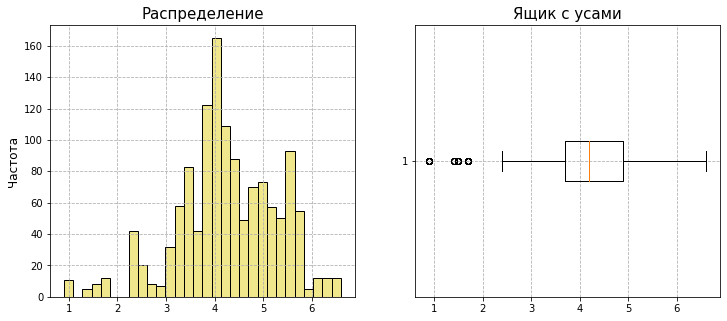

Описательная статистика:
count    1300.000000
mean        4.253769
std         1.014814
min         0.900000
25%         3.700000
50%         4.200000
75%         4.900000
max         6.600000
Name: маркет_актив_6_мес, dtype: float64
-------------------------------------------------------------------------------------------------------------------------------
Столбец "маркет_актив_тек_мес"


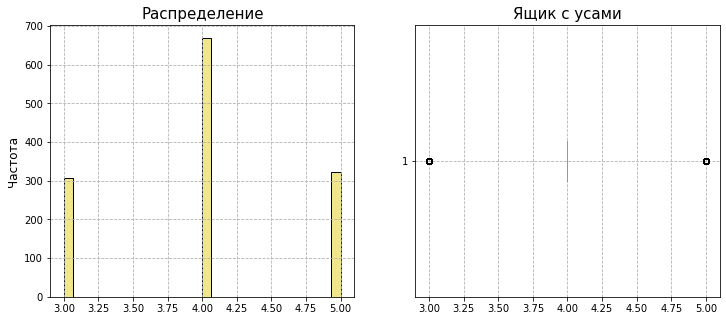

Описательная статистика:
count    1300.000000
mean        4.011538
std         0.696868
min         3.000000
25%         4.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: маркет_актив_тек_мес, dtype: float64
-------------------------------------------------------------------------------------------------------------------------------
Столбец "длительность"


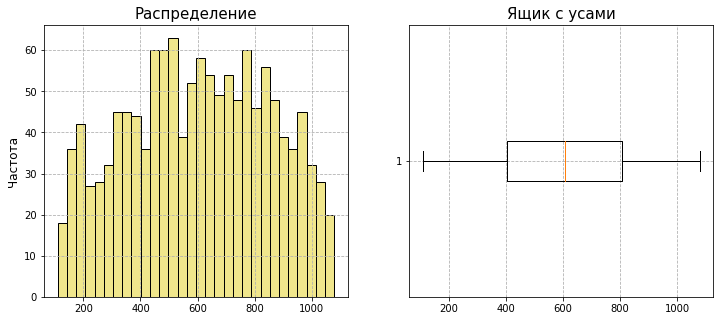

Описательная статистика:
count    1300.000000
mean      601.898462
std       249.856289
min       110.000000
25%       405.500000
50%       606.000000
75%       806.000000
max      1079.000000
Name: длительность, dtype: float64
-------------------------------------------------------------------------------------------------------------------------------
Столбец "акционные_покупки"


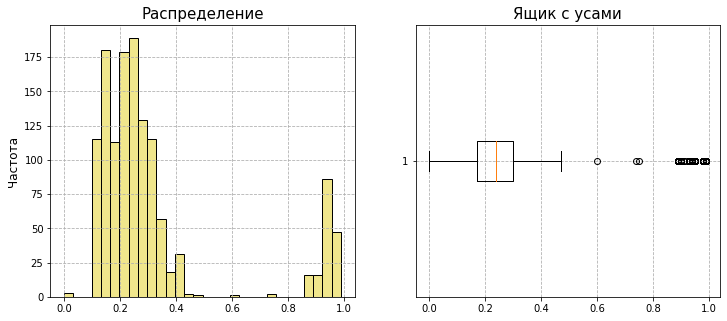

Описательная статистика:
count    1300.000000
mean        0.319808
std         0.249843
min         0.000000
25%         0.170000
50%         0.240000
75%         0.300000
max         0.990000
Name: акционные_покупки, dtype: float64
-------------------------------------------------------------------------------------------------------------------------------
Столбец "средний_просмотр_категорий_за_визит"


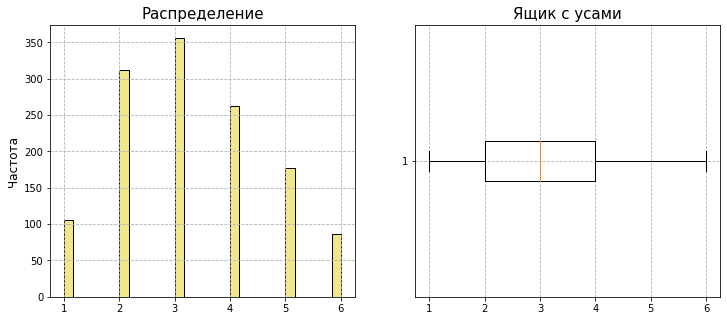

Описательная статистика:
count    1300.00000
mean        3.27000
std         1.35535
min         1.00000
25%         2.00000
50%         3.00000
75%         4.00000
max         6.00000
Name: средний_просмотр_категорий_за_визит, dtype: float64
-------------------------------------------------------------------------------------------------------------------------------
Столбец "неоплаченные_продукты_штук_квартал"


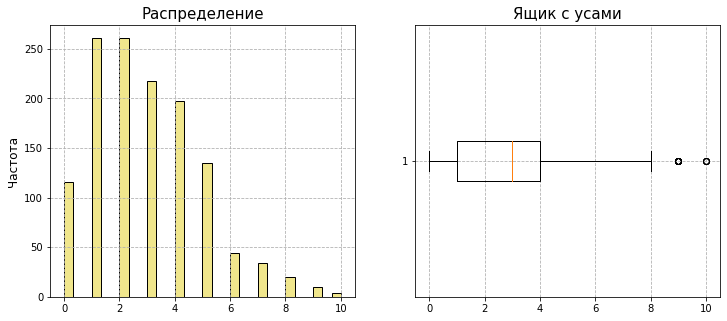

Описательная статистика:
count    1300.000000
mean        2.840000
std         1.971451
min         0.000000
25%         1.000000
50%         3.000000
75%         4.000000
max        10.000000
Name: неоплаченные_продукты_штук_квартал, dtype: float64
-------------------------------------------------------------------------------------------------------------------------------
Столбец "ошибка_сервиса"


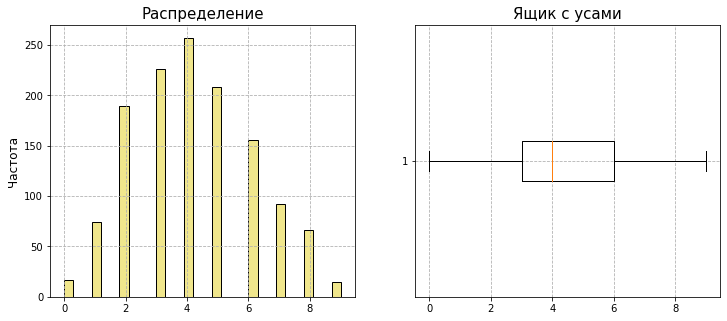

Описательная статистика:
count    1300.000000
mean        4.185385
std         1.955298
min         0.000000
25%         3.000000
50%         4.000000
75%         6.000000
max         9.000000
Name: ошибка_сервиса, dtype: float64
-------------------------------------------------------------------------------------------------------------------------------
Столбец "страниц_за_визит"


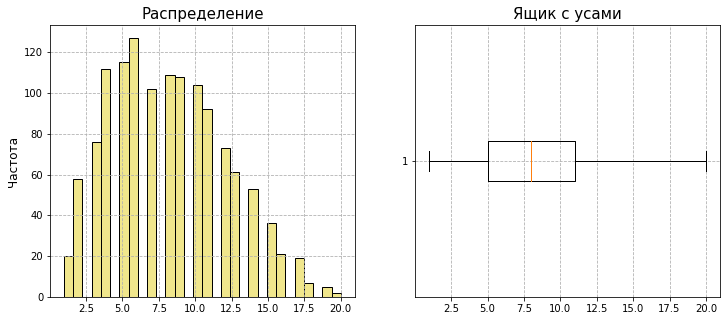

Описательная статистика:
count    1300.000000
mean        8.176923
std         3.978126
min         1.000000
25%         5.000000
50%         8.000000
75%        11.000000
max        20.000000
Name: страниц_за_визит, dtype: float64
-------------------------------------------------------------------------------------------------------------------------------


In [37]:
# создаём переменную, сожержащую только числовые столбцы df_market_file (без id)
df_market_file_num = df_market_file[df_market_file.select_dtypes(include='number').columns].drop(['id'], axis=1)

# применяем функцию hist_box_func
print('Исследовательский анализ числовых данных df_market_file\n')
for i in df_market_file_num:
    print(f'Столбец "{i}"')
    hist_box_func(df_market_file_num[i])
    plt.show()
    print(line_1)

#### Категориальные признаки

Исследовательский анализ категориальных данных df_market_file

Столбец "покупательская_активность"

Прежний уровень    802
Снизилась          498
Name: покупательская_активность, dtype: int64


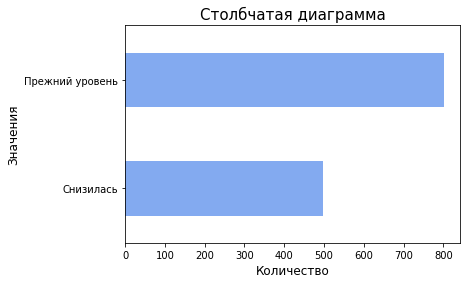

-------------------------------------------------------------------------------------------------------------------------------


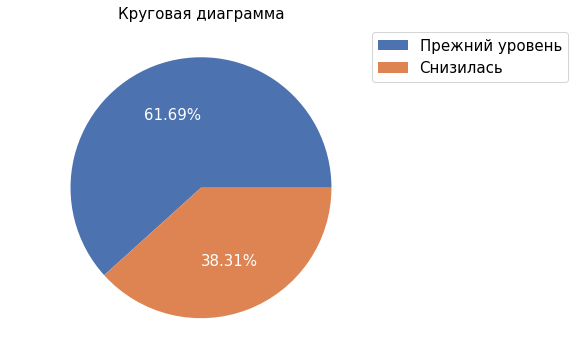

_______________________________________________________________________________________________________________________________
Столбец "тип_сервиса"

стандарт    924
премиум     376
Name: тип_сервиса, dtype: int64


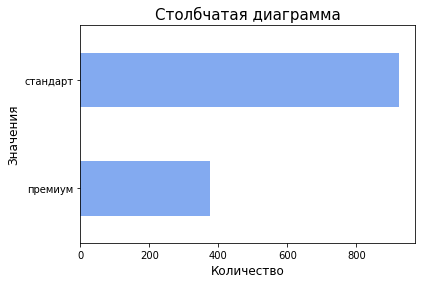

-------------------------------------------------------------------------------------------------------------------------------


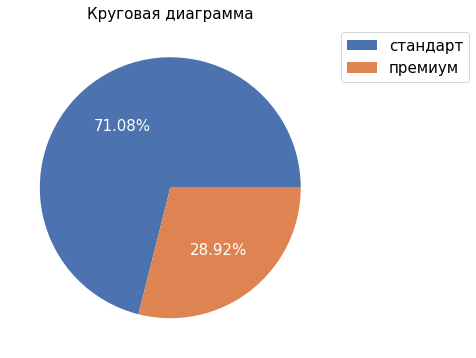

_______________________________________________________________________________________________________________________________
Столбец "разрешить_сообщать"

да     962
нет    338
Name: разрешить_сообщать, dtype: int64


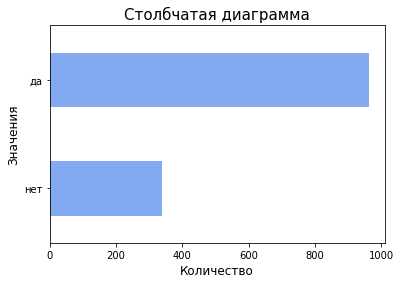

-------------------------------------------------------------------------------------------------------------------------------


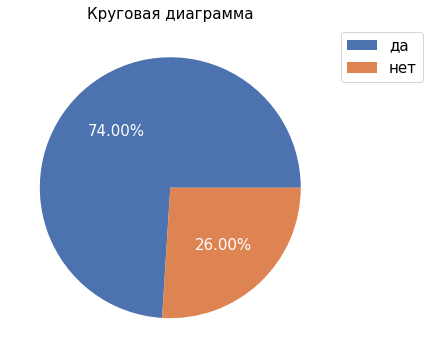

_______________________________________________________________________________________________________________________________
Столбец "популярная_категория"

Товары для детей                        330
Домашний текстиль                       251
Косметика и аксессуары                  223
Техника для красоты и здоровья          184
Мелкая бытовая техника и электроника    174
Кухонная посуда                         138
Name: популярная_категория, dtype: int64


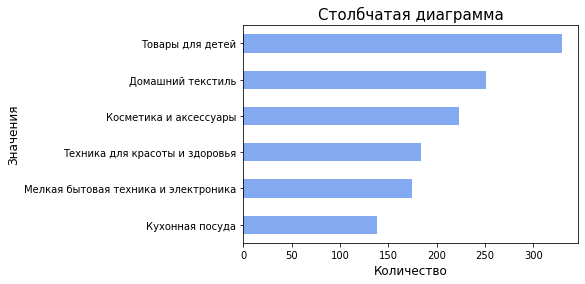

-------------------------------------------------------------------------------------------------------------------------------


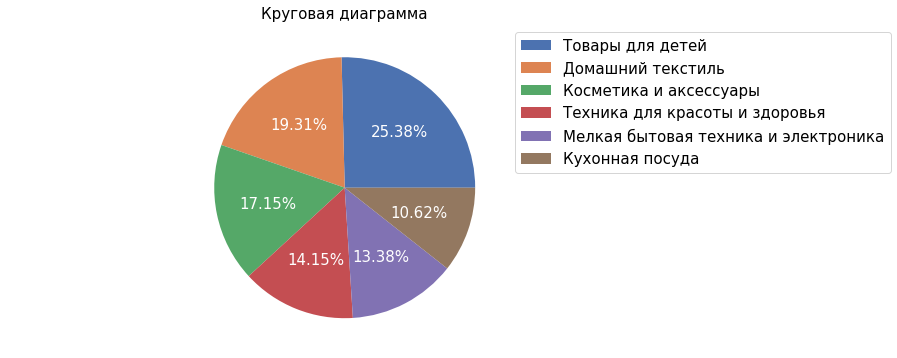

_______________________________________________________________________________________________________________________________


In [38]:
# создаём переменную, сожержащую только категориальные столбцы
df_market_file_cat = df_market_file[df_market_file.select_dtypes(exclude='number').columns]

# применяем функцию для визуализации категориальных признаков
print('Исследовательский анализ категориальных данных df_market_file\n')
for i in df_market_file_cat:
    print(f'Столбец "{i}"')
    cat_func(df_market_file_cat[i])
    plt.show()

**Таблица 1: Промежуточные выводы по распределениям числовых признаков `df_market_file`.**

|Столбец                                 |Распределение |Среднее |Медиана |Min |Max |
|:---------------------------------------|:-------------|:-------------|:-------------|:-------------|:-------------|
|**маркет_актив_6 мес**                  |**Похоже на нормальное.** С локальными незначительными пиками.   |4.25   |4.20   |0.9   |6.60   |
|**маркет_актив_тек_мес**                |**Мультимодальное.** Наблюдаем три пика: **3.0, 4.0 и 5.0**   |4.01   |4.00   |3.0   |5.00   |
|**длительность**                        |**Стремится к нормальному.** Самый "свежий" пользователь зарегистрировался **110** дней назад. Есть небольшие локальные пики на **200, 500, 800 и около 1000**.  |601.90   |606.00   |110.0   |1079.00   |
|**акционные_покупки**                   |**Бимодальное.** Есть часть покупателей, которая за рассматриваемый период имеет долю покупок, совершённых по акции, близкую к единице.   |0.32   |0.24   |0.0   |0.99   |
|**средний_просмотр_категорий_за_визит** |**Похоже на нормальное.**   |3.27   |3.00   |1.0   |6.00   |
|**неоплаченные_продукты_штук_квартал**  |**Похоже на нормальное, но скошенное.**   |2.84   |3.00   |0.0   |10.00   |
|**ошибка_сервиса**                      |**Нормальное.**   |4.19   |4.00   |0.0   |9.00  |
|**страниц_за_визит**                    |**Похоже на нормальное.**   |8.18   |8.00   |1.0   |20.00   |

### Исследовательский анализ `df_market_money`

In [39]:
# выведем на экран типы данных df_market_money
print(f'Типы данных "df_market_money":\n{df_market_money.dtypes}')

Типы данных "df_market_money":
id           int64
период      object
выручка    float64
dtype: object


#### Числовые признаки

Исследовательский анализ числовых данных df_market_money

Столбец "выручка"


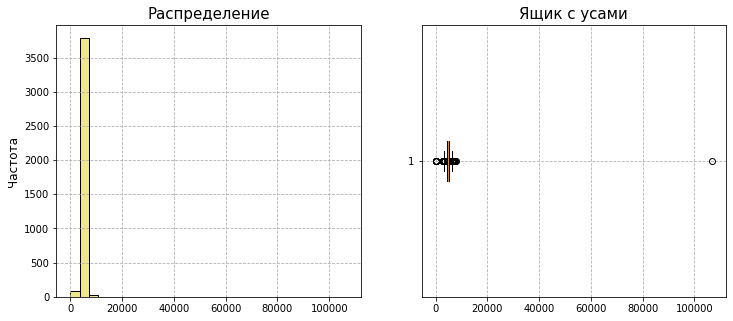

Описательная статистика:
count      3900.000000
mean       5025.696051
std        1777.704104
min           0.000000
25%        4590.150000
50%        4957.500000
75%        5363.000000
max      106862.200000
Name: выручка, dtype: float64
-------------------------------------------------------------------------------------------------------------------------------


In [40]:
# создаём переменную для числовых столбцов df_market_money (без id)
df_market_money_num = (df_market_money
                       [df_market_money.select_dtypes(include='number').columns]
                       .drop(['id'], axis=1))

# применяем функцию hist_box_func
print('Исследовательский анализ числовых данных df_market_money\n')
for i in df_market_money_num:
    print(f'Столбец "{i}"')
    hist_box_func(df_market_money_num[i])
    plt.show()
    print(line_1)

Слишком неинформативные графики. С этой ситуацией мы столкнулись в начале исследования.  
Всё дело в аномальных значениях выручки **0.0** и **106862.2**.

Изучим распределение без них.

Исследовательский анализ числовых данных df_market_money

Столбец "выручка"


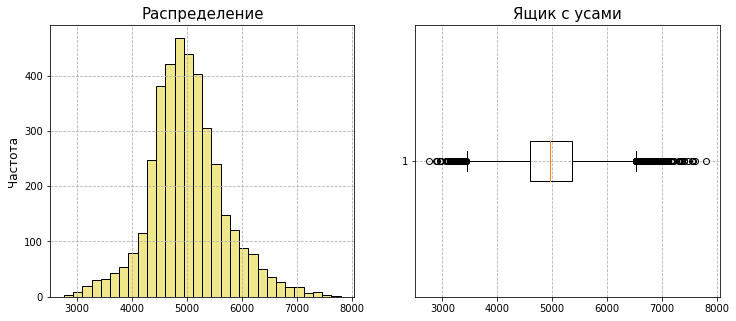

Описательная статистика:
count    3893.000000
mean     5007.282918
std       679.724898
min      2758.700000
25%      4592.000000
50%      4959.000000
75%      5363.000000
max      7799.400000
Name: выручка, dtype: float64
-------------------------------------------------------------------------------------------------------------------------------


In [41]:
# создаём переменную для числовых столбцов df_market_money (без id) без аномальных значений
df_market_money_num = (df_market_money.query('0 < выручка < 106862.2')
                       [df_market_money.select_dtypes(include='number').columns]
                       .drop(['id'], axis=1))

# применяем функцию hist_box_func
print('Исследовательский анализ числовых данных df_market_money\n')
for i in df_market_money_num:
    print(f'Столбец "{i}"')
    hist_box_func(df_market_money_num[i])
    plt.show()
    print(line_1)

#### Категориальные признаки

Исследовательский анализ категориальных данных df_market_money

Столбец "период"

предпредыдущий_месяц    1300
предыдущий_месяц        1300
текущий_месяц           1300
Name: период, dtype: int64


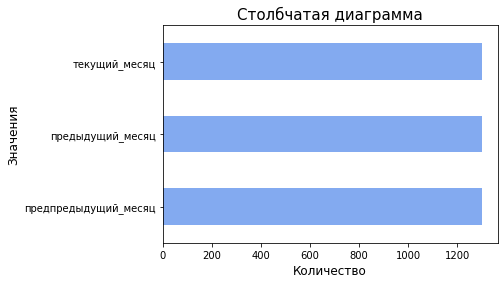

-------------------------------------------------------------------------------------------------------------------------------


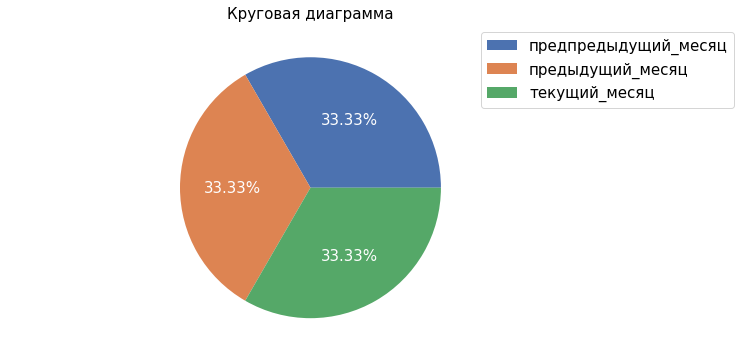

_______________________________________________________________________________________________________________________________


In [42]:
# создаём переменную с категориальными столбцами df_market_money
df_market_money_cat = df_market_money[df_market_money.select_dtypes(exclude='number').columns]

# применяем функцию для визуализации категориальных признаков
print('Исследовательский анализ категориальных данных df_market_money\n')
for i in df_market_money_cat:
    print(f'Столбец "{i}"')
    cat_func(df_market_money_cat[i])
    plt.show()

**Таблица 2: Промежуточные выводы по распределениям числовых признаков `df_market_money`.**

|Столбец                                 |Распределение |Среднее |Медиана |Min |Max |
|:---------------------------------------|:-------------|:-------------|:-------------|:-------------|:-------------|
|**выручка**                  |**Нормальное.** Большинство наблюдений расположены в промежутке **4500-5500**.   |5007.28   |4959.00   |2758.7   |7799.4   |

### Исследовательский анализ `df_market_time`

In [43]:
# выведем на экран типы данных df_market_time
print(f'Типы данных "df_market_time":\n{df_market_time.dtypes}')

Типы данных "df_market_time":
id         int64
период    object
минут      int64
dtype: object


#### Числовые признаки

Исследовательский анализ числовых данных df_market_time

Столбец "минут"


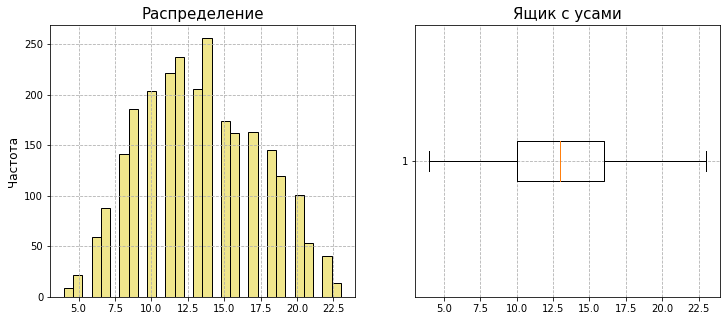

Описательная статистика:
count    2600.000000
mean       13.336154
std         4.080198
min         4.000000
25%        10.000000
50%        13.000000
75%        16.000000
max        23.000000
Name: минут, dtype: float64
-------------------------------------------------------------------------------------------------------------------------------


In [44]:
# создаём переменную с числовыми столбцами df_market_time (без id)
df_market_time_num = df_market_time[df_market_time.select_dtypes(include='number').columns].drop(['id'], axis=1)

# применяем функцию hist_box_func
print('Исследовательский анализ числовых данных df_market_time\n')
for i in df_market_time_num:
    print(f'Столбец "{i}"')
    hist_box_func(df_market_time_num[i])
    plt.show()
    print(line_1)

#### Категориальные признаки

Исследовательский анализ категориальных данных df_market_time

Столбец "период"

предыдущий_месяц    1300
текущий_месяц       1300
Name: период, dtype: int64


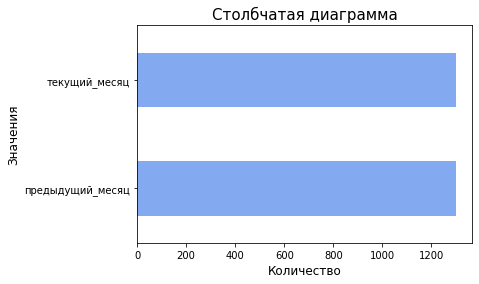

-------------------------------------------------------------------------------------------------------------------------------


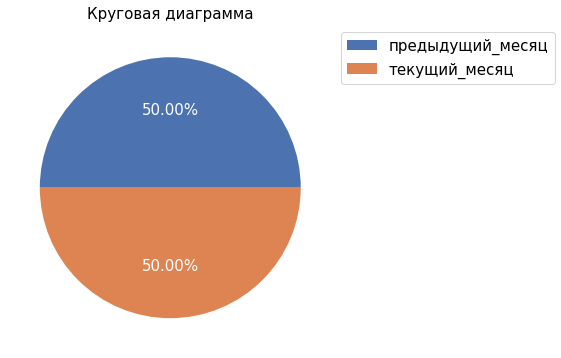

_______________________________________________________________________________________________________________________________


In [45]:
# создаём переменную с категориальными столбцами df_market_time
df_market_time_cat = df_market_time[df_market_time.select_dtypes(exclude='number').columns]

# применяем функцию для визуализации категориальных признаков
print('Исследовательский анализ категориальных данных df_market_time\n')
for i in df_market_time_cat:
    print(f'Столбец "{i}"')
    cat_func(df_market_time_cat[i])
    plt.show()

**Таблица 3: Промежуточные выводы по распределениям числовых признаков `df_market_time`.**

|Столбец                                 |Распределение |Среднее |Медиана |Min |Max |
|:---------------------------------------|:-------------|:-------------|:-------------|:-------------|:-------------|
|**минут**                  |**Нормальное.**   |13.34   |13.0   |4.0   |23.0   |

### Исследовательский анализ `df_money`

In [46]:
# выведем на экран типы данных df_money
print(f'Типы данных "df_money":\n{df_money.dtypes}')

Типы данных "df_money":
id           int64
прибыль    float64
dtype: object


Столбцы с **категориальными** значениями отсутствуют, поэтому рассматривать будем только **числовые**.

#### Числовые признаки

Исследовательский анализ числовых данных df_money

Столбец "прибыль"


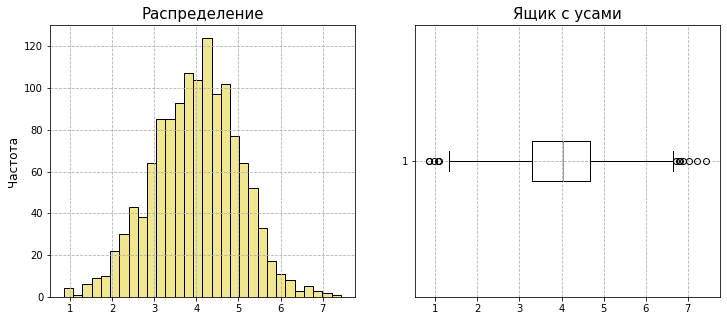

Описательная статистика:
count    1300.000000
mean        3.996631
std         1.013722
min         0.860000
25%         3.300000
50%         4.045000
75%         4.670000
max         7.430000
Name: прибыль, dtype: float64
-------------------------------------------------------------------------------------------------------------------------------


In [47]:
# создаём переменную с числовыми столбцами df_money (без id)
df_money_num = df_money.drop(['id'], axis=1)

# применяем функцию hist_box_func
print('Исследовательский анализ числовых данных df_money\n')
for i in df_money_num:
    print(f'Столбец "{i}"')
    hist_box_func(df_money_num[i])
    plt.show()
    print(line_1)

**Таблица 4: Промежуточные выводы по распределениям числовых признаков `df_money`.**

|Столбец                                 |Распределение |Среднее |Медиана |Min |Max |
|:---------------------------------------|:-------------|:-------------|:-------------|:-------------|:-------------|
|**прибыль**                  |**Нормальное.**   |3.99   |4.0   |0.86   |7.43   |

### Отберём клиентов с покупательской активностью не менее трёх месяцев

Для этого использовать будем данные из датафрейма **`df_market_money`**, содержащего информацию о выручке.  

Как нам известно, данные о выручке известны за текущий месяц и за два предшествующих. Нам необходимо отобрать активных клиентов, то есть таких, которые совершали покупки в каждом из трех последних месяцев.

In [48]:
# создадим переменную с номерами id пользователей, которые не совершали покупок в каком-либо периоде,
# и выведем результат на экран
no_active_id = df_market_money.loc[(df_market_money['выручка'] == 0)]['id'].unique()
print(f'id пользователей с непостоянной покупательской активностью: {no_active_id}')

# создадим переменную с пользователями, которые совершали покупки в каждом из последних трёх месяцев
active_users_three_months = df_market_money[df_market_money.id.isin(no_active_id) == False]

# выведем на экран количество строк со всеми пользователями и после отсеивания
print('Всего строк df_market_money:', len(df_market_money))
print('Строк после отсеивания пользователей с непостоянной активностью:', len(active_users_three_months))

# создадим переменную с пользователями, которые не совершали покупки в каждом из последних трёх месяцев
no_active_users_three_months = df_market_money[df_market_money.id.isin(no_active_id) == True]

# выведем на экран пользователей с нопостоянной активностью
print('\nПользователи с непостоянной активностью:')
no_active_users_three_months

id пользователей с непостоянной покупательской активностью: [215348 215357 215359]
Всего строк df_market_money: 3900
Строк после отсеивания пользователей с непостоянной активностью: 3891

Пользователи с непостоянной активностью:


id                период  выручка
0   215348  предпредыдущий_месяц      0.0
1   215348         текущий_месяц   3293.1
2   215348      предыдущий_месяц      0.0
27  215357         текущий_месяц   5986.3
28  215357  предпредыдущий_месяц      0.0
29  215357      предыдущий_месяц      0.0
33  215359         текущий_месяц   4735.0
34  215359      предыдущий_месяц      0.0
35  215359  предпредыдущий_месяц      0.0

In [49]:
print('Количество пользователей с постоянной покупательской активностью в течение последних трёх месяцев:', 
      active_users_three_months['id'].nunique())

Количество пользователей с постоянной покупательской активностью в течение последних трёх месяцев: 1297


Как видим, есть пользователи, не совершающие покупки каждый месяц.

In [50]:
# убираем пользователей с непостоянной покупательской активностью
df_market_money = df_market_money[df_market_money.id.isin(no_active_id) == False]

# проверяем
df_market_money['id'].nunique()

1297

***Клиенты с постоянной покупательской активностью на протяжении последних трёх месяцев отобраны.***

### Обработка выбросов

В столбце `выручка` были обнаружены аномальные значения **0.00** и **106862.2**.

Однако пользователей с нулевой выручкой мы уже исключили. Остаться должно было только аномально высокое значение выручки.  
Проверим.

In [51]:
print('min:', df_market_money['выручка'].min())
print('max:', df_market_money['выручка'].max())

min: 2758.7
max: 106862.2


Всё верно. Осталось только аномально высокое значение выручки **106862.2**.

Ранее мы также рассмотрели выручку данного клиента за все рассматриваемые периоды. Аномальное значение зафиксировано в текущем месяце, а в предыдущие два месяца средняя выручка составляет **5500**. То есть, для данного покупателя такое потребительское поведение явно не свойственно.

Также учитывая, что **среднее** для всего столбца `выручка` равно **5025.7**, а **медиана** равна **4957.5**, всё-таки склоняюсь к тому, что значение выручки **106862.2** является **выбросом**. Уж слишком оно сильно выбиватеся из общего ряда. К тому же, значение, превышающее среднее **в 21 раз**, может негативно сказаться на качетсве модели машинного обучения.

Исключим пользователя с аномальной выручкой из датасета.

In [52]:
# определяем id пользователя с выбросом в выручке
id_to_delete = df_market_money[df_market_money['выручка'] == 106862.2]['id'].tolist()

# избавляемся от выброса
# уляляем данные о всех периодах для выбранного пользователя
df_market_money = df_market_money.query('id != @id_to_delete')

# проверяем
df_market_money['id'].nunique()

1296

### Вывод по исследовательсвкому анализу данных:

Изучили, визуализировали и описали числовые и категориальные признаки в имеющихся датафреймах:
* с помощью гистограмм изучили распределения числовых признаков и их типы
* с помощью диаграмм размаха проверили числовые признаки на наличие выбросов
* с помощью столбчатых и круговых диаграмм изучили категориальные признаки

---
**Анализ числовых признаков:**

|Датафрейм                                 |Столбец                                 |Распределение |Среднее |Медиана |
|:---------------------------------------|:---------------------------------------|:-------------|:-------------|:-------------|
|**df_market_file**                  |**маркет_актив_6 мес**                  |**Похоже на нормальное.** С локальными пиками.   |4.25   |4.20   |
||**маркет_актив_тек_мес**                |**Мультимодальное.** Наблюдаем три пика: **3.0, 4.0 и 5.0**   |4.01   |4.00   |
||**длительность**                        |**Похоже на нормальное.** |601.90   |606.00   |
||**акционные_покупки**                   |**Бимодальное.**|0.32   |0.24   |
||**средний_просмотр_категорий_за_визит** |**Похоже на нормальное.**   |3.27   |3.00   |
||**неоплаченные_продукты_штук_квартал**  |**Похоже на нормальное скошенное.**   |2.84   |3.00   |
||**ошибка_сервиса**                      |**Нормальное.**   |4.19   |4.00   |
||**страниц_за_визит**                    |**Похоже на нормальное.**   |8.18   |8.00   |
|**df_market_money**                  |**выручка**                  |**Нормальное.**|5007.28   |4959.0   |0.0   |106862.2   |
|**df_market_time**                  |**минут**                  |**Нормальное.**   |13.34   |13.0   |4.0   |23.0   |
|**df_money**                  |**прибыль**                  |**Нормальное.**   |3.99   |4.0   |0.86   |7.43   |

---
**Анализ категориальных признаков:**

1. Датафрейм **`df_market_file`**:
    * Столбец **`покупательская_активность`**
        * *802 пользователя имеют **Прежний уровень** (61.69%) ;*
        * *остальные наблюдения -* ***снизилась*** *;*
    * Столбец **`тип_сервиса`** 
        * *924 раза встречается **стандарт** (71.08%) ;*
        * *остальные наблюдения -* ***премиум*** *;*
    * Столбец **`разрешить_сообщать`**
        * *962 раза встречается **да** (74.00%) ;*
        * *остальные наблюдения -* ***нет*** *;*
    * Столбец **`популярная_категория`** - ТОП-3:
        * *330 наблюдений - **Товары для детей** (25.38%) ;*
        * *251 наблюдений - **Домашний текстиль** (19.31%) ;*
        * *223 наблюдений - **Косметика и аксессуары** (17.15%) ;*


2. Датафрейм **`df_market_money`**:
    * Столбец **`период`** - наблдения распределены поровну, по **1300**, между:
        * *предыдущий_месяц;*
        * *текущий_месяц;*
        * *предпредыдущий_месяц;*


3. Датафрейм **`df_market_time`**:
    * Столбец **`период`** - наблдения распределены пополам, по **1300**, между:
        * *предыдущий_месяц;*
        * *текущий_месяц;*


4. Датафрейм **`df_money`** столбцов с категориальными данными не имеет.

---
Отобрали пользователей с ежемесячной покупательской активностью и сохранили их в переменную **`active_users_three_months`**.  

Количество таких пользователей равно **1297**.

**id** пользователей, которые не совершают покупки ежемесячно:
* 215348
* 215357
* 215359

У них активность была зафиксирована только в **текущем** месяце.

Исключили пользователей с непостоянной покупательской активностью (тех, которые **не** совершали покупки ежемесячно на протяжении последних трёх месяцев).

---
В датафрейме **`df_market_money`** в столбце **`выручка`** был обнаружен выброс - **106862.2**. Его значение в среднем в 21 раз превышает остальные. Пользователя с подозрительным значением выручки исключили из датафрейма.

В результате, после исключения пользователей с нулевыми выручками и с выбросом, оставили **1296** пользователей для моделирования.

В остальных датафреймах выбросы обнаружены не были.

---

## Шаг 4. Объединение таблиц

Объединим датафреймы **`df_market_file`**, **`df_market_money`** и **`df_market_time`**. 

Учитывая, что данные о выручке и времени на сайте находятся в одном столбце для всех периодов, в итоговой таблице для каждого периода сделаем отдельный столбец.

**Перед объединением таблиц преобразуем признак `покупательская_активность` в датафрейме `df_market_file` - изменим категориальные значения `Снизилась` и `Прежний уровень` на `1` и `0`.**

In [53]:
# с помощью собственной функции преобразуем категориальные значения 'покупательская_активность' в числовые
# 'Снизилась' преобразуем в 1
# 'Прежний уровень' преобразуем в 0

# зададим переменные для преобразования
cat_value_one = 'Снизилась'
cat_value_two = 'Прежний уровень'

# перезапишем столбец 'покупательская_активность' с помощью функции to_binary_func
df_market_file['покупательская_активность'] = df_market_file['покупательская_активность'].apply(to_binary_func)

# проверяем
print(df_market_file['покупательская_активность'].value_counts())
df_market_file.head()

0    802
1    498
Name: покупательская_активность, dtype: int64


id  покупательская_активность тип_сервиса разрешить_сообщать  \
0  215348                          1     премиум                 да   
1  215349                          1     премиум                 да   
2  215350                          1    стандарт                нет   
3  215351                          1    стандарт                 да   
4  215352                          1    стандарт                нет   

   маркет_актив_6_мес  маркет_актив_тек_мес  длительность  акционные_покупки  \
0                 3.4                     5           121               0.00   
1                 4.4                     4           819               0.75   
2                 4.9                     3           539               0.14   
3                 3.2                     5           896               0.99   
4                 5.1                     3          1064               0.94   

  популярная_категория  средний_просмотр_категорий_за_визит  \
0     Товары для детей                                    6   
1     Товары для детей                                    4   
2    Домашний текстиль                                    5   
3     Товары для детей                                    5   
4     Товары для детей                                    3   

   неоплаченные_продукты_штук_квартал  ошибка_сервиса  страниц_за_визит  
0                                   2               1                 5  
1                                   4               2                 5  
2                                   2               1                 5  
3                                   0               6                 4  
4                                   2               3                 2

Преобразование прошло корректно.

---
**Переходим к объединению таблиц.**

In [54]:
# выделим из df_market_money и df_market_time отдельные датарфеймы для каждого периода
df_market_money_tek_mes = (df_market_money
                           .query('период == "текущий_месяц"')
                           .drop(['период'], axis=1)
                           .rename(columns={'выручка': 'выручка_текущий_месяц'}))

df_market_money_pre_mes = (df_market_money
                           .query('период == "предыдущий_месяц"')
                           .drop(['период'], axis=1)
                           .rename(columns={'выручка': 'выручка_предыдущий_месяц'}))

df_market_money_prepre_mes = (df_market_money
                              .query('период == "предпредыдущий_месяц"')
                              .drop(['период'], axis=1)
                              .rename(columns={'выручка': 'выручка_предпредыдущий_месяц'}))

df_market_time_tek_mes = (df_market_time
                          .query('период == "текущий_месяц"')
                          .drop(['период'], axis=1)
                          .rename(columns={'минут': 'минут_текущий_месяц'}))

df_market_time_pre_mes = (df_market_time
                          .query('период == "предыдущий_месяц"')
                          .drop(['период'], axis=1)
                          .rename(columns={'минут': 'минут_предыдущий_месяц'}))

In [55]:
# объединяем датафреймы
df_merged_final = (df_market_file
                   .merge(df_market_money_tek_mes, on='id')
                   .merge(df_market_money_pre_mes, on='id')
                   .merge(df_market_money_prepre_mes, on='id')
                   .merge(df_market_time_tek_mes, on='id')
                   .merge(df_market_time_pre_mes, on='id')
                   .reset_index(drop=True))

# проверяем
print(df_merged_final.shape)
df_merged_final.head()

(1296, 18)


id  покупательская_активность тип_сервиса разрешить_сообщать  \
0  215349                          1     премиум                 да   
1  215350                          1    стандарт                нет   
2  215351                          1    стандарт                 да   
3  215352                          1    стандарт                нет   
4  215353                          1    стандарт                 да   

   маркет_актив_6_мес  маркет_актив_тек_мес  длительность  акционные_покупки  \
0                 4.4                     4           819               0.75   
1                 4.9                     3           539               0.14   
2                 3.2                     5           896               0.99   
3                 5.1                     3          1064               0.94   
4                 3.3                     4           762               0.26   

  популярная_категория  средний_просмотр_категорий_за_визит  \
0     Товары для детей                                    4   
1    Домашний текстиль                                    5   
2     Товары для детей                                    5   
3     Товары для детей                                    3   
4    Домашний текстиль                                    4   

   неоплаченные_продукты_штук_квартал  ошибка_сервиса  страниц_за_визит  \
0                                   4               2                 5   
1                                   2               1                 5   
2                                   0               6                 4   
3                                   2               3                 2   
4                                   1               1                 4   

   выручка_текущий_месяц  выручка_предыдущий_месяц  \
0                 4971.6                    5216.0   
1                 5058.4                    5457.5   
2                 6610.4                    6158.0   
3                 5872.5                    5807.5   
4                 5388.5                    4738.5   

   выручка_предпредыдущий_месяц  минут_текущий_месяц  минут_предыдущий_месяц  
0                        4472.0                   10                      12  
1                        4826.0                   13                       8  
2                        4793.0                   13                      11  
3                        4594.0                   11                       8  
4                        5124.0                   10                      10

### Вывод по объединению таблиц:

1. Перед объединением таблиц преобразовали признак **`покупательская_активность`** в датафрейме **`df_market_file`** - категориальные значения **`Снизилась`** и **`Прежний уровень`** изменили на **`1`** и **`0`**;


2. Объединили датафреймы **`df_market_file`**, **`df_market_money`** и **`df_market_time`** и сохранили в переменную **`df_merged_final`**;


3. В итоговой таблице для каждого периода из **`df_market_money`** и **`df_market_time`** сделали отдельный столбец;


4. Размерность объединённого датафрейма:
    * **1296** строк
    * **18** столбцов

---

## Шаг 5. Корреляционный анализ

**Задачи этапа:** 

1. Провести корреляционный анализ признаков в количественной шкале в итоговой таблице для моделирования
2. Сделать выводы о мультиколлинеарности и при необходимости устранить её

Вспомним распределения количественных признаков:
1. **`df_market_file`** 
    - *маркет_актив_6 мес* - нормальное
    - *маркет_актив_тек_мес* - **ненормальное, мультимодальное**
    - *длительность* - нормальное
    - *акционные_покупки* - **ненормальное, бимодальное**
    - *средний_просмотр_категорий_за_визит* - нормальное
    - *неоплаченные_продукты_штук_квартал* - нормальное
    - *ошибка_сервиса* - нормальное
    - *страниц_за_визит* - нормальное
    
    
2. **`df_market_money`**    
    - *выручка* - нормальное


3. **`df_market_time`**    
    - *минут* - нормальное

Но у нас также есть и столбцы, содержащие категориальные данные:
* *покупательская_активность*
* *тип_сервиса*
* *разрешить_сообщать*
* *популярная_категория*

Используем библиотеку **phik** для подсчёта корреляции между признаками разных типов данных.

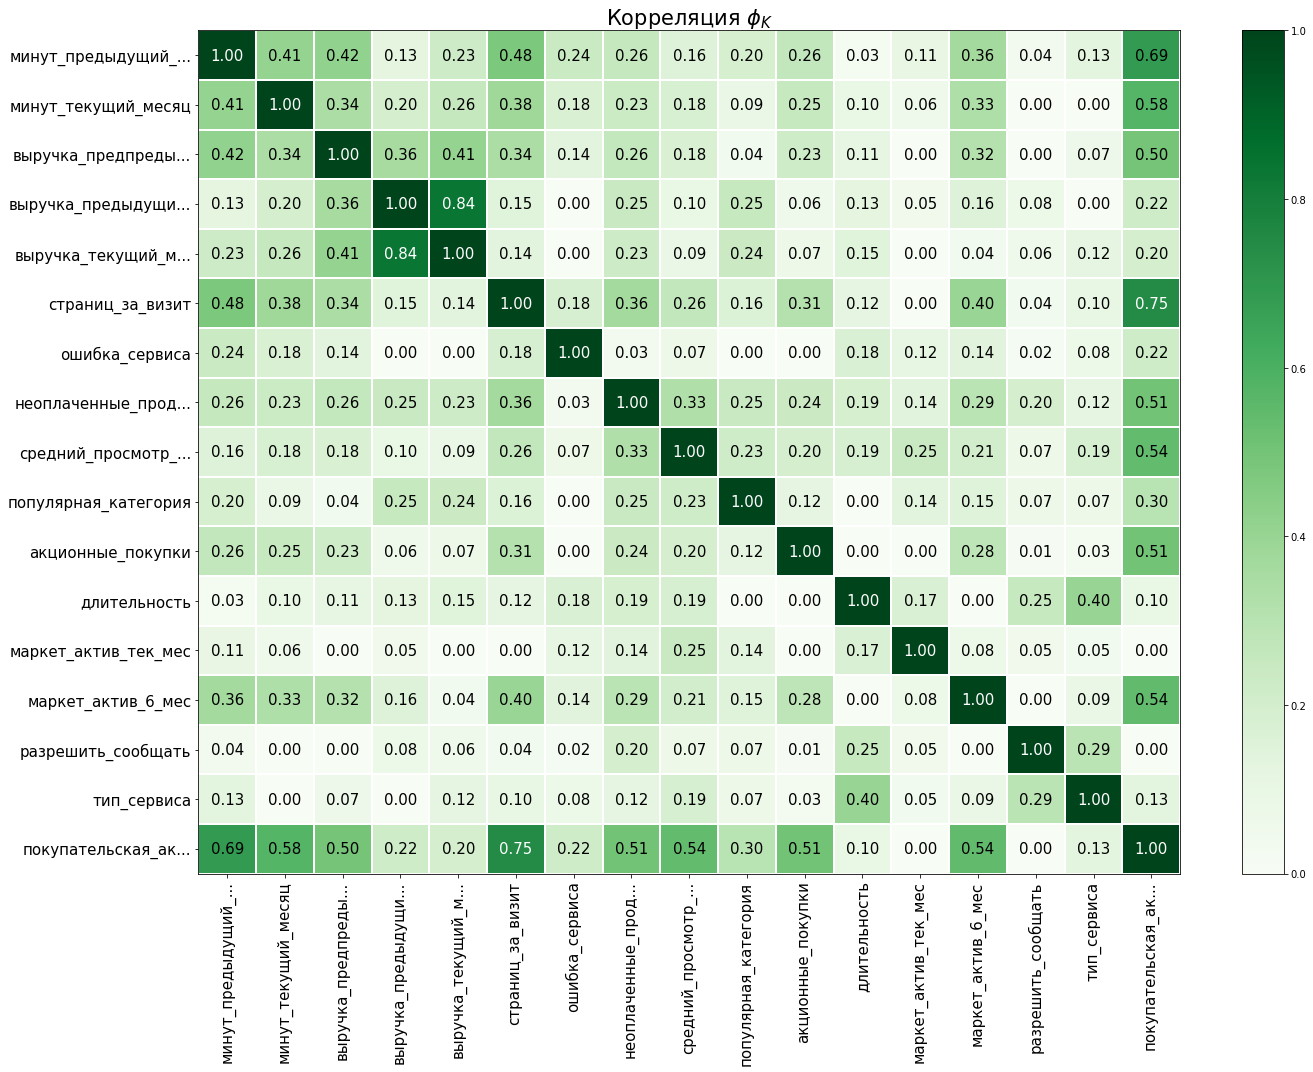

In [56]:
# строим матрицу корреляции
phik_overview = (
    df_merged_final
    .drop('id', axis=1)
    .phik_matrix(verbose=False))

# визуализируем матрицу и выводим на экран
plot_correlation_matrix(
    phik_overview.values,
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index,
    vmin=0, vmax=1, color_map='Greens',
    title=r'Корреляция $\phi_K$',
    fontsize_factor=1.5,
    figsize=(20, 15)
)

In [57]:
# для удобства выведем на экран признаки из матрицы
print('Признаки для матрицы корреляции:\n')
for col in df_merged_final:
    print(col)

Признаки для матрицы корреляции:

id
покупательская_активность
тип_сервиса
разрешить_сообщать
маркет_актив_6_мес
маркет_актив_тек_мес
длительность
акционные_покупки
популярная_категория
средний_просмотр_категорий_за_визит
неоплаченные_продукты_штук_квартал
ошибка_сервиса
страниц_за_визит
выручка_текущий_месяц
выручка_предыдущий_месяц
выручка_предпредыдущий_месяц
минут_текущий_месяц
минут_предыдущий_месяц


### Вывод по корреляционному анализу данных:

Целевой признак: **`покупательская_активность`**. Остальные - **входные**.

**Корреляционные взаимосвязи:**

*(наиболее сильные и значимые взаимосвязи выделены цветом)*

|Входной признак                         |Коэффициент<br>корреляции |Взаимосвязь с целевым признаком |
|:---------------------------------------|:------------------------:|:-------------------------------|
|**тип_сервиса**                         |0.13 |Слабая, практически отсутствует.
|**разрешить_сообщать**                  |0.00 |Отсутствует
|<font color="Green">**маркет_актив_6 мес**                  |<font color="Green">**0.54** |<font color="Green">**Заметная**
|**маркет_актив_тек_мес**                |0.00 |Отсутствует
|**длительность**                        |0.10 |Слабая, практически отсутствует
|<font color="Green">**акционные_покупки**                   |<font color="Green">**0.51** |<font color="Green">**Заметная**
|<font color="Green">**популярная_категория**                |<font color="Green">**0.30** |<font color="Green">**Умеренная**
|<font color="Green">**средний_просмотр_категорий_за_визит** |<font color="Green">**0.54** |<font color="Green">**Заметная**
|<font color="Green">**неоплаченные_продукты_штук_квартал**  |<font color="Green">**0.51** |<font color="Green">**Заметная**
|**ошибка_сервиса**                      |0.22 |Слабая
|<font color="Green">**страниц_за_визит**                    |<font color="Green">**0.75** |<font color="Green">**Высокая, максимальная среди остальных**
|**выручка_текущий_месяц**               |0.20 |Слабая
|**выручка_предыдущий_месяц**            |0.22 |Слабая
|<font color="Green">**выручка_предпредыдущий_месяц**        |<font color="Green">**0.50** |<font color="Green">**Заметная**
|<font color="Green">**минут_текущий_месяц**                 |<font color="Green">**0.58** |<font color="Green">**Заметная**
|<font color="Green">**минут_предыдущий_месяц**              |<font color="Green">**0.69** |<font color="Green">**Заметная, близкая к высокой**

 
О мультиколлинеарности свидетельствует значение коэффициента корреляции **от 0.9 до 0.95** по модулю. Соответственно, можем сделать вывод, что в нашем случае мультиколлинеарность отсутствует.

---

## Шаг 6. Использование пайплайнов

### Проверка дисбаланса классов

Соотношение классов признака "покупательская_активность" (в %):
0    0.62
1    0.38
Name: покупательская_активность, dtype: float64


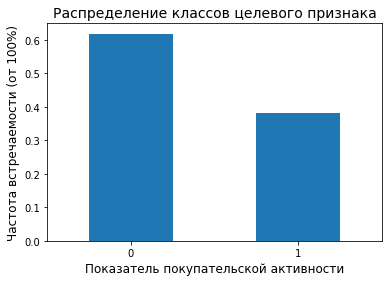

In [58]:
# проверяем целевой признак на дисбаланс классов
print('Соотношение классов признака "покупательская_активность" (в %):')
print(round(df_merged_final.покупательская_активность.value_counts(normalize=True), 2))

# визуализируем на графике
df_merged_final.покупательская_активность.value_counts(normalize=True).plot(kind='bar')
plt.title('Распределение классов целевого признака', size=14)
plt.xlabel('Показатель покупательской активности', size=12)
plt.ylabel('Частота встречаемости (от 100%)', size=12)
plt.xticks(rotation=0);

Соотношение классов в целевом признаке непропорционально - **62%** (`прежний уровень`, класс **0**) против **38%** (`снизилась`, класс **1**).  
Поэтому, чтобы сохранить пропорцию классов в тренировочной и тестовой выборках, используем стратификацию.

---
### Разделение данных на выборки с учётом стратификации по целевому признаку

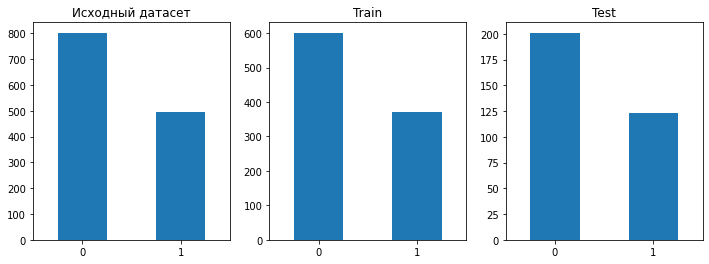

In [59]:
# устанавливаем RANDOM_STATE и TEST_SIZE
RANDOM_STATE = 42
TEST_SIZE = 0.25

# выделяем в отдельные переменные целевой признак и входные признаки
X = df_merged_final.drop(columns=['покупательская_активность', 'id'])
y = df_merged_final['покупательская_активность']

# разбиваем данные на выборки с учётом стратификации по целевому признаку
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    random_state=RANDOM_STATE, 
    test_size=TEST_SIZE, 
    stratify=y
) 

# визуализируем баланс целевого признака в выборках
fig, ax = plt.subplots(1,3, figsize=(12,4))
y.value_counts().plot(kind='bar', ax=ax[0], rot=0)
ax[0].set_title("Исходный датасет")
y_train.value_counts().plot(kind='bar', ax=ax[1], rot=0)
ax[1].set_title("Train")
y_test.value_counts().plot(kind='bar', ax=ax[2], rot=0)
ax[2].set_title("Test")
plt.show()

Разделение на выборки с учетом дисбаланса классов целевого признака прошло корректно.

---
### Создание пайплайна

Создадим пайплайн, который выберет лучшую комбинацию модели и гиперпараметров.

Используем модели:
* **`DecisionTreeClassifier()`** с гиперпараметрами:
    * **max_depth** от **2 до 4** включительно
    * **max_features** от **2 до 4** включительно


* **`KNeighborsClassifier()`** с гиперпараметром:
    * **n_neighbors** от **2 до 4** включительно


* **`LogisticRegression()`**:
    * с *решателем* **solver='liblinear'** и *лассо-регуляризацией* с гиперпараметром:
    * **С** от **1 до 4** включительно


* **`SVC()`**:
    * с линейным ядром **kernel='linear'** с гиперпараметром:
    * перебор «силы» модели для ядра: от **1 до 9** включительно


После выбора лучшей модели рассчитаем метрику `ROC-AUC` на тренировочной и тестовой выборках.  
Выбираем именно `ROC-AUC`, так как данная метрика лучше всего подойдёт для задачи бинарной классификации с несбалансированным целевым признаком.

In [85]:
# создаём списки с названиями признаков для кодирования и масштабирования/стандартизации
# признаки для кодирования OneHotEncoder
ohe_columns = ['популярная_категория']

# признаки для кодирования OrdinalEncoder
ord_columns = ['тип_сервиса', 'разрешить_сообщать']

# признаки для масштабирования/стандартизации
num_columns = ['маркет_актив_6_мес', 
               'маркет_актив_тек_мес', 
               'длительность', 
               'акционные_покупки', 
               'средний_просмотр_категорий_за_визит', 
               'неоплаченные_продукты_штук_квартал', 
               'ошибка_сервиса', 
               'страниц_за_визит', 
               'выручка_текущий_месяц', 
               'выручка_предыдущий_месяц', 
               'выручка_предпредыдущий_месяц', 
               'минут_текущий_месяц', 
               'минут_предыдущий_месяц']

# добавляем OHE-кодирование в пайплайн
ohe_pipe = Pipeline([('ohe', OneHotEncoder(drop='first', handle_unknown='error', sparse_output=False))])

# добавляем Ordinal-кодирование в пайплайн
ord_pipe = Pipeline(
    [('ord', OrdinalEncoder(
    categories=[
        ['стандарт', 'премиум'], 
        ['да', 'нет']
    ], 
    handle_unknown='use_encoded_value', 
    unknown_value=np.nan))
                    ]
                   )

# создаём общий пайплайн для подготовки данных
data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('ord', ord_pipe, ord_columns),
     ('num', MinMaxScaler(), num_columns)
    ], 
    remainder='passthrough'
)

# создаём итоговый пайплайн для обучения модели
pipe_final = Pipeline(
    [
        ('preprocessor', data_preprocessor),
        ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
    ]
)

param_grid = [
    # словарь для модели DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 5),
        'models__max_features': range(2, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler()]  
    },
    
    # словарь для модели KNeighborsClassifier() 
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler()]   
    },

    # словарь для модели LogisticRegression()
    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE, 
            solver='liblinear', 
            penalty='l1'
        )],
        'models__C': range(1, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler()]  
    },
    
]

# выберем лучшую модель и параметры с помощью RandomizedSearchCV()
# количество комбинаций гиперпараметров поставим 5
randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    n_iter=5,
    random_state=RANDOM_STATE,
    n_jobs=-1
)
# обучаем лучшую модель на тренировочных данных
randomized_search.fit(X_train, y_train)

# выводим на экран лучшую модель, её параметры и метрику ROC-AUC на тренировочной выборке
print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)
print(line_1)
print(f'Параметры лучшей модели:\n{randomized_search.best_params_}')
print(line_1)
print ('Метрика лучшей модели на тренировочной выборке:', round(randomized_search.best_score_, 3))
print(line_1)

# проверяем работу модели на тестовой выборке
y_test_pred = randomized_search.predict(X_test)
print(f'Метрика ROC-AUC на тестовой выборке: {round(roc_auc_score(y_test, y_test_pred), 3)}')

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  ['популярная_категория']),
                                                 ('ord',
                                                  Pipeline(steps=[('ord',
                                                                   OrdinalEncoder(categories=[['стандарт',
                                                                                               'премиум'],
                                                                                              ['да',
                    

In [61]:
# преобразовываем результаты в датафрейм и выводим результаты на экран
pd.DataFrame(randomized_search.cv_results_)[
    ['std_test_score', 'rank_test_score', 'param_models', 'mean_test_score','params']
].sort_values('rank_test_score')

std_test_score  rank_test_score                             param_models  \
1        0.019270                1    SVC(kernel='linear', random_state=42)   
4        0.010621                2                   KNeighborsClassifier()   
3        0.027646                3  DecisionTreeClassifier(random_state=42)   
2        0.015382                4  DecisionTreeClassifier(random_state=42)   
0        0.043607                5  DecisionTreeClassifier(random_state=42)   

   mean_test_score  \
1         0.892249   
4         0.874768   
3         0.743766   
2         0.741896   
0         0.696723   

                                                                                                                                          params  
1                                       {'preprocessor__num': StandardScaler(), 'models__C': 6, 'models': SVC(kernel='linear', random_state=42)}  
4                                              {'preprocessor__num': RobustScaler(), 'models__n_neighbors': 4, 'models': KNeighborsClassifier()}  
3  {'preprocessor__num': StandardScaler(), 'models__max_features': 2, 'models__max_depth': 2, 'models': DecisionTreeClassifier(random_state=42)}  
2    {'preprocessor__num': MinMaxScaler(), 'models__max_features': 2, 'models__max_depth': 3, 'models': DecisionTreeClassifier(random_state=42)}  
0    {'preprocessor__num': MinMaxScaler(), 'models__max_features': 3, 'models__max_depth': 2, 'models': DecisionTreeClassifier(random_state=42)}

### Вывод по использованию пайплайнов:

Построили пайплайн и выбрали лучшую комбинацию модели и гиперпараметров с использованием *четырёх* моделей:
* **DecisionTreeClassifier()**
* **KNeighborsClassifier()**
* **LogisticRegression()**
* **SVC()**

---
Лучшая модель: 
* **SVC(kernel='linear')**
* с «силой» **6** 
* и скалером **StandardScaler()**

Метрика `ROC-AUC` лучшей модели на тринировочной выборке: **0.892**

Метрика `ROC-AUC` лучшей модели на тестовой выборке: **0.899**

---

## Шаг 7. Анализ важности признаков

**Задача:** оценить важность признаков для лучшей модели и построить график важности с помощью метода `SHAP`. 

---
**Лучшая модель по результатам работы пайплайна: `SVC(kernel='linear', С=6)`**

Со следующей подготовкой данных:
* **OneHotEncoder()** для `ohe_columns`
* **OrdinalEncoder()** для `ord_columns`
* **StandardScaler()** для `num_columns`

---
### Подготовим данные и обучим модель

In [62]:
# кодируем категориальные признаки с помощью OneHotEncoder()
ohe_encoder = OneHotEncoder(sparse_output=False, drop='first')
X_train_ohe = ohe_encoder.fit_transform(X_train[ohe_columns])
X_test_ohe = ohe_encoder.transform(X_test[ohe_columns])
ohe_encoder_col_names = ohe_encoder.get_feature_names_out()

# кодируем категориальные признаки с помощью OrdinalEncoder()
ord_encoder = OrdinalEncoder()
X_train_ord = ord_encoder.fit_transform(X_train[ord_columns])
X_test_ord = ord_encoder.transform(X_test[ord_columns])
ord_encoder_col_names = ord_encoder.get_feature_names_out()

# масштабируем количественные признаки с помощью StandardScaler()
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_columns])
X_test_scaled = scaler.transform(X_test[num_columns])

# создаём тренировочный и тестовый датафреймы из закодированных и отмасштабированных данных
X_train_ohe = pd.DataFrame(X_train_ohe, columns=ohe_encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=ohe_encoder_col_names)

X_train_ord = pd.DataFrame(X_train_ord, columns=ord_encoder_col_names)
X_test_ord = pd.DataFrame(X_test_ord, columns=ord_encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_columns)

# объединяем все преобразованные данные в тренировочный и тестовый датафреймы
X_train_first = pd.concat([X_train_ohe, X_train_ord], axis=1)
X_train_final = pd.concat([X_train_first, X_train_scaled], axis=1)

X_test_first = pd.concat([X_test_ohe, X_test_ord], axis=1)
X_test_final = pd.concat([X_test_first, X_test_scaled], axis=1)

# проверяем размерности выборок
print('Размерности выборок:')

shape_data = {'Выборка': ['X_train_final', 'X_test_final', 'y_train', 'y_test'], 
              'Размер': [X_train_final.shape, X_test_final.shape, y_train.shape, y_test.shape]} 

display(pd.DataFrame(shape_data))

Размерности выборок:


Выборка     Размер
0  X_train_final  (972, 20)
1   X_test_final  (324, 20)
2        y_train     (972,)
3         y_test     (324,)

---
### Обучаем лучшую модель с лучшими параметрами

In [63]:
# объявляем классификатор и обучаем модель
clf_best = SVC(kernel='linear', C=6, probability=True, random_state=42)
clf_best.fit(X_train_final, y_train)
y_pred = clf_best.predict(X_test_final)

# в отдельную переменную сохраняем предсказания принадлежности к классам для тестовых данных
clf_best_probas = clf_best.predict_proba(X_test_final)[:,1]

# считаем метрику ROC-AUC для тренировочных и тестовых данных
print('Метрики Best Model:')
roc_auc_cv = cross_val_score(clf_best, X_train_final, y_train, scoring='roc_auc').mean()
print(f'ROC-AUC на тренировочной выборке: {round(roc_auc_cv, 3)}')
print(f'ROC-AUC на тестовой выборке: {round(roc_auc_score(y_test, y_pred), 3)}')

# оценка качества модели по метрике accuracy
clf_best_acc = accuracy_score(y_test, y_pred)
print('Accuracy:', round(clf_best_acc, 3))

# выводим F1-меру
clf_best_f1 = f1_score(y_test, y_pred, pos_label=1)
print('F1-score:', round(clf_best_f1, 3))

Метрики Best Model:
ROC-AUC на тренировочной выборке: 0.892
ROC-AUC на тестовой выборке: 0.899
Accuracy: 0.92
F1-score: 0.885


***Модель обучена!***

---
### Проверим модель на адекватность с помщью `DummyClassifier()`

In [64]:
# создание и обучение модели DummyClassifier 
dummy_model = DummyClassifier(random_state=RANDOM_STATE)
dummy_model.fit(X_train_final, y_train)

# предсказание на тестовых данных
dummy_model_preds = dummy_model.predict(X_test_final)

# считаем метрику ROC-AUC для тренировочных и тестовых данных
print('Метрики Dummy Model:')
d_roc_auc_cv = cross_val_score(dummy_model, X_train_final, y_train, scoring='roc_auc').mean()
print(f'ROC-AUC на тренировочной выборке: {round(d_roc_auc_cv, 3)}')

# оценка качества модели по метрике ROC-AUC
dummy_roc = roc_auc_score(y_test, dummy_model_preds)
print('ROC-AUC на тестовой выборке:', round(dummy_roc,2))

# оценка качества модели по метрике accuracy
dummy_acc = accuracy_score(y_test, dummy_model_preds)
print('Accuracy:', round(dummy_acc, 2))

# выводим F1-меру
dummy_f1 = f1_score(y_test, dummy_model_preds, pos_label=1)
print('F1-score:', round(dummy_f1,2))

Метрики Dummy Model:
ROC-AUC на тренировочной выборке: 0.5
ROC-AUC на тестовой выборке: 0.5
Accuracy: 0.62
F1-score: 0.0


Результаты модели **SVC** лучше **Dummy Model**. Выбранная модель адекватна и эффективна. 

**Accuracy** не учитывает дисбаланс классов, и её оценка качества модели будет не совсем верной.  
Поэтому данную метрику можно не брать в расчет.

**Метрики лучшей модели:**
* *ROC-AUC на тренировочной выборке -* ***0.892***
* *ROC-AUC на тестовой выборке -* ***0.899***
* *F1-мера -* ***0.885***

### Построим матрицу ошибок с помощью `ConfusionMatrixDisplay()`

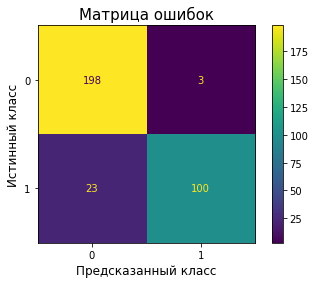

Отчет о классификации:
-------------------------------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       201
           1       0.97      0.81      0.88       123

    accuracy                           0.92       324
   macro avg       0.93      0.90      0.91       324
weighted avg       0.92      0.92      0.92       324

-------------------------------------------------------------------------------------------------------------------------------


In [65]:
# построим матрицу ошибок для тестовых данных функцией ConfusionMatrixDisplay()
ConfusionMatrixDisplay.from_estimator(clf_best, X_test_final, y_test)
plt.title('Матрица ошибок', size=15)
plt.xlabel('Предсказанный класс', size=12)
plt.ylabel('Истинный класс', size=12)
plt.show()

# выводим отчет о классификации
print(f'Отчет о классификации:\n{line_1}\n{classification_report(y_test, y_pred)}\n{line_1}')

Модель верно предсказала:
* ***класс 0*** *(прежний уровень)* - **198** раз
* ***класс 1*** *(снизилась)* - **100** раз
* *ошибка False Negative* - **23** раза
* *ошибка False Positive* - **3** раза 

Текущая модель в **23** случаях для покупателей со снижением покупательской активности (**класс 1**) предсказала её сохранение на прежнем уровне (**класс 0**). То есть, мы в таком случае допускаем снижение их покупательской активности, а в худшем случае такие покупатели вообще могут уйти.

Возможно, **False Negative** можно улучшить сменой порога.  
Попробуем рассмотреть разные варианты порога принадлежности к **классу 1**.

---
### Рассмотрим ситуации со значениями порога от 0.1 до 0.55

In [66]:
# создаём пустые списки для добавления элементов
thresholds = [0.1, 0.2, 0.3, 0.4, 0.55]
columns = []
precision = []
recall = []
accuracy = []
roc_auc = []
f1_sc = []
false_positive = []
false_negative = []
true_positive = []
true_negative = []

# наполняем списки значениями
for i in thresholds:
    columns.append('y_pred_'+str(i))
    preds = np.where(clf_best.predict_proba(X_test_final)[:,1] > i, 1, 0)
    precision.append(round(precision_score(y_test, preds), 2))
    recall.append(round(recall_score(y_test, preds), 2))
    accuracy.append(round(accuracy_score(y_test, preds), 2))
    roc_auc.append(round(roc_auc_score(y_test, preds), 3))
    f1_sc.append(round(f1_score(y_test, preds), 3))   
    false_positive.append(confusion_matrix(y_test, preds)[0, 1])
    false_negative.append(confusion_matrix(y_test, preds)[1, 0])
    true_positive.append(confusion_matrix(y_test, preds)[1, 1])
    true_negative.append(confusion_matrix(y_test, preds)[0, 0])

# формируем датафрем из получившихся списков    
frame = pd.DataFrame(zip(columns, 
                         precision, 
                         recall,
                         accuracy, 
                         roc_auc, 
                         f1_sc,
                         false_positive, 
                         false_negative, 
                         true_positive, 
                         true_negative), 
                     columns = ['Порог', 
                                'precision', 
                                'recall', 
                                'accuracy', 
                                'roc_auc', 
                                'f1_score',
                                'false_positive', 
                                'false_negative', 
                                'true_positive ', 
                                'true_negative']) 

# выводим датафрем с перебором порогов на экран
frame

Порог  precision  recall  accuracy  roc_auc  f1_score  \
0   y_pred_0.1       0.51    0.94      0.64    0.695     0.663   
1   y_pred_0.2       0.65    0.89      0.77    0.798     0.751   
2   y_pred_0.3       0.75    0.86      0.84    0.844     0.803   
3   y_pred_0.4       0.82    0.83      0.87    0.860     0.826   
4  y_pred_0.55       0.97    0.81      0.92    0.899     0.885   

   false_positive  false_negative  true_positive   true_negative  
0             111               7             116             90  
1              60              13             110            141  
2              35              17             106            166  
3              22              21             102            179  
4               3              23             100            198

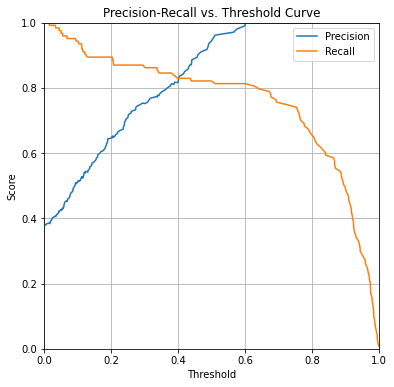

In [67]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, thresholds = precision_recall_curve(y_test, clf_best_probas)

plt.figure(figsize=(6, 6))
plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.title('Precision-Recall vs. Threshold Curve')
plt.grid(True)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()

Видим, что со снижением порога сильно снижаются метрики качества модели.  

При лучшем варианте **False Negative**, равному **7** при пороге **0.1**, будем иметь **False Positive** равный **111**. То есть, в **111** случаях снижение покупательской активности будет предсказано для тех покупателей, у которых эта активность на самом деле сохранится на прежнем уровне.

На основании таких данных бизнес может принять неверные решения и, допустим, в качестве поддерживающих мер отправить промокоды на хорошие скидки тем пользователям, чья покупательская активность не снизится. А в таком случае для бизнеса это будет упущенная выгода от покупок пользователей без скидок.

При пороге **0.2** имеем **False Negative** равный **13**, что по сравнению с **23** весьма неплохо. Но **False Positive** в таком случае будет равен **60**. А при пороге **0.3** **False Positive** будет равен **35** при **False Negative** равному **17**. 

Будет ли бизнесу выгодно ошибочно отправлять промокоды **60-ти** или **35-ти** покупателям?  
Это уже будет зависеть от того, какие скидки будут в этих промокодах.

**Поэтому по результатам перебора порогов думается, что лучше оставить порог без изменений.**  
В текущем виде модель выглядит наиболее сбалансировано:
* упускаем **23** покупателя со снижением покупательской активности, но снижение еще не значит уход
* ошибочно стимулируем **3-х** покупателей скидками, что, на мой взгляд выглядит, очень даже не плохо

В любом случае, эту информацию стоит донести до заказчика, чтобы он учитывал эти моменты при формировании персонализированных акционных предложений.

---
### Посмотрим на разделяющую границу между классами

Для этого обучим модель на признаках, показавших самые высокие коэффициенты корреляции с целевым признаком на **phik-матрице**:
* *страниц_за_визит*
* *минут_предыдущий_месяц*

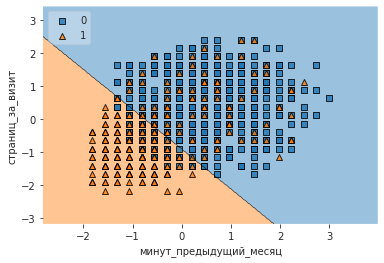

In [68]:
# обозначаем признаки для обучения
columns = ['страниц_за_визит', 'минут_предыдущий_месяц']

# передаём признаки в тренировочную выборку и стандартизируем
X_new_train = X_train_final[columns]
X_new_scalled = scaler.fit_transform(X_new_train)

# обучаем модель
clf_best_new = SVC(kernel='linear', C=6, probability=True, random_state=42)
clf_best_new.fit(X_new_scalled, y_train)

# строим разделяющую границу между классами
sns.set_style(style='white')
plot_decision_regions(X_new_scalled, y_train.to_numpy(), clf=clf_best_new, legend=2)
plt.xlabel(columns[1])
plt.ylabel(columns[0])
plt.show()

***Разделяющая граница выглядит достаточно оптимально.***

---
### Составим рейтинг признаков, которые вносят наибольший вклад в модель

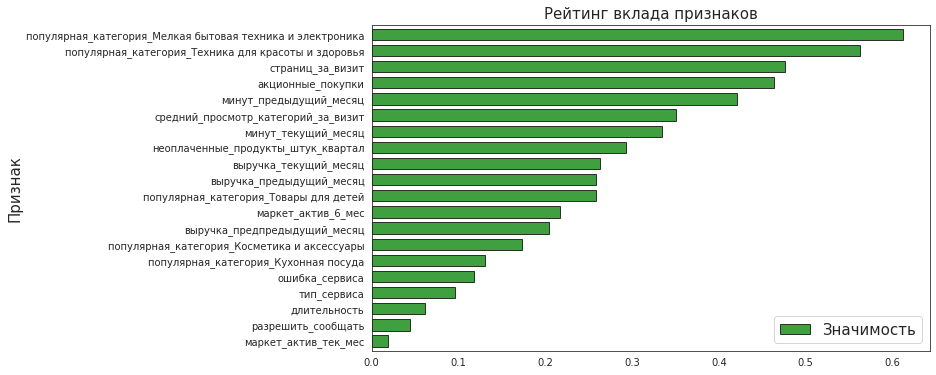

In [69]:
# отложим значения коэффициентов на графике
coeffs = clf_best.coef_[0]
feature_importance = pd.DataFrame({'Признак': X_train_final.columns, 'Значимость': np.abs(coeffs)})
feature_importance = feature_importance.sort_values(by='Значимость', ascending=True)
feature_importance.plot(x='Признак', 
                        y='Значимость', 
                        kind='barh', 
                        figsize=(10, 6), 
                        ec='black', 
                        alpha=0.75, 
                        lw=1, color='g', 
                        width=0.7)
plt.legend(prop={'size': 15})
plt.ylabel('Признак', size=15)
plt.title('Рейтинг вклада признаков', size=15)
plt.show()

---
***Исходя из графика, выделим ТОП-5 признаков с наибольшим вкладом в модель:***

* *популярная_категория_Мелкая бытовая техника и электроника*
* *популярная_категория_Техника для красоты и здоровья*
* *страниц_за_визит*
* *акционные_покупки*
* *минут_предыдущий_месяц*

***Также выделим ТОП-5 признаков с наименьшим вкладом в модель:***

* *ошибка_сервиса*
* *тип_сервиса*
* *длительность*
* *разрешить_сообщать*
* *маркет_актив_тек_мес*

---
### Отберём 10 лучших признаков на основе статистических тестов с помощью `SelectKBest()`

Для отбора будем использовать **`f_classif`** - тест на основании линейной зависимости между двумя случайными признаками. 

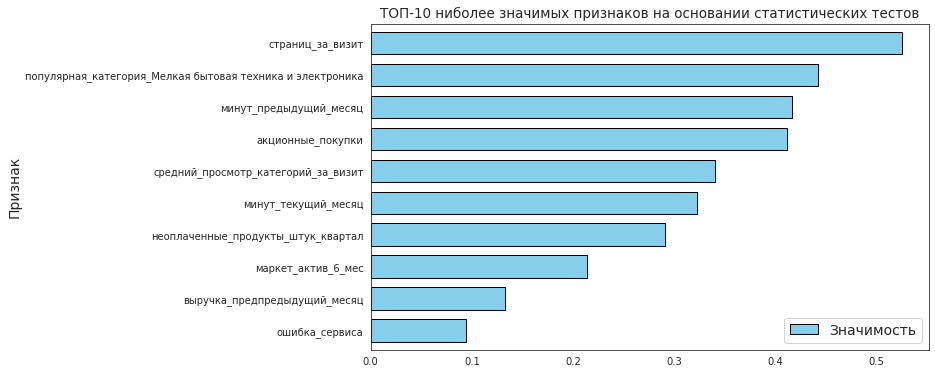

In [70]:
# выбираем селектор с нужными параметрами
# рассмотрим 10 признаков
selector = SelectKBest(f_classif, k=10)

# создаём новый набор данных (10 наиболее важных признаков из выборки)
X_new = selector.fit_transform(X_train_final, y_train)

# формируем выборки с лучшими признаками
features_names = X_train_final.columns[selector.get_support(indices=True)]
X_train_new = X_train_final[list(features_names)]
X_test_new = X_test_final[list(features_names)]

# обучаем модель
clf_best_fit_new = SVC(kernel='linear', C=6, probability=True, random_state=42)
clf_best_fit_new.fit(X_train_new, y_train)

# отложим значения коэффициентов на графике
coefficients = clf_best_fit_new.coef_[0]
feature_importance = pd.DataFrame({'Признак': features_names, 'Значимость': np.abs(coefficients)})
feature_importance = feature_importance.sort_values(by='Значимость', ascending=True)
feature_importance.plot(x='Признак', 
                        y='Значимость', 
                        kind='barh', 
                        figsize=(10, 6), 
                        color='skyblue', 
                        ec='black', 
                        lw=1, 
                        width=0.7)
plt.legend(prop={'size': 14})
plt.ylabel('Признак', size=14)
plt.title('ТОП-10 ниболее значимых признаков на основании статистических тестов', size=13.5)
plt.show()

---
***Статистические тесты дали следующий результат (ТОП-5):***

* *страниц_за_визит*
* *популярная_категория_Мелкая бытовая техника и электроника*
* *минут_предыдущий_месяц*
* *акционные_покупки*
* *средний_просмотр_категорий_за_визит*

---
### Проверка `permutation importance` с F1-мерой

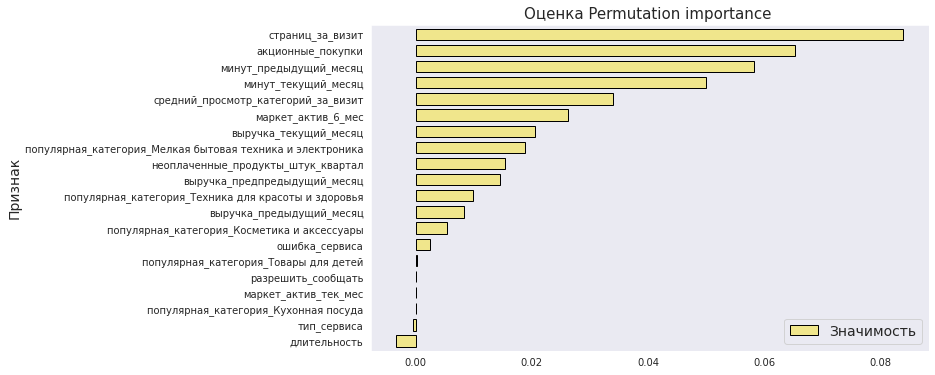

In [71]:
# выбираем новый селектор с нужными параметрами
selector_new = SelectKBest(f_classif, k=20)
X_new_new = selector_new.fit_transform(X_train_final, y_train)
features_names_new = X_train_final.columns[selector_new.get_support(indices=True)]

# функция расчёта оценки качества
def custom_f1(model, X, y):
    y_pred = model.predict(X)
    score = f1_score(y, y_pred)
    return score

result_new = permutation_importance(clf_best, X_test_final, y_test, scoring=custom_f1)

feature_importance_new = pd.DataFrame({'Признак': features_names_new, 'Значимость': result_new['importances_mean']})
feature_importance_new = feature_importance_new.sort_values('Значимость', ascending=True)
sns.set_style('dark')
feature_importance_new.plot(x='Признак', 
                            y='Значимость', 
                            kind='barh', 
                            figsize=(10, 6), 
                            color='khaki', 
                            ec='black', 
                            lw=1, 
                            width=0.7)
plt.legend(prop={'size': 14})
plt.ylabel('Признак', size=14)
plt.title('Оценка Permutation importance ', size=15)
plt.show()

---
***Перемешивание значений выявило следующих фаворитов:***

***`страниц_за_визит`, `минут_предыдущий_месяц` и `акционные_покупки`*** - одни из самых значимых признаков.

---
### Изучим важность признаков методом SHAP

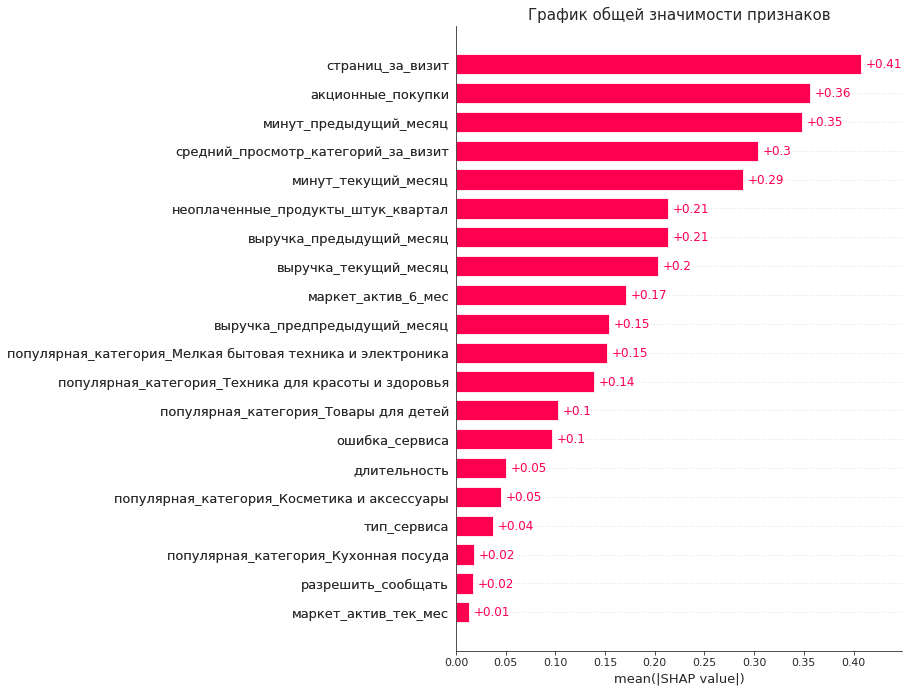

-------------------------------------------------------------------------------------------------------------------------------


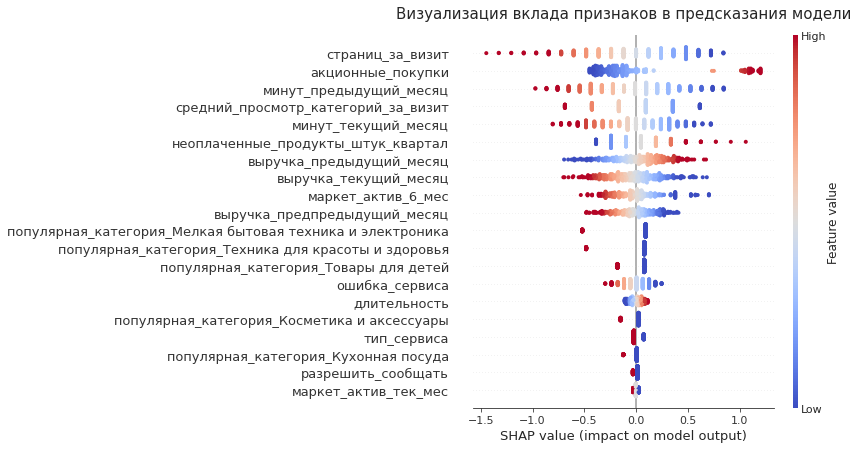

In [72]:
# строим график общей значимости признаков для лучшей модели
explainer = shap.Explainer(clf_best, X_test_final)
shap_values = explainer(X_test_final)
sns.set_style('white')
shap.plots.bar(shap_values, max_display=20, show=False)
plt.title('График общей значимости признаков', size=15)
plt.show()
print(line_1)

# визуализируем вклад признаков на диаграмме
shap.summary_plot(shap_values, X_test_final, show=False, plot_size=[12, 6], cmap='coolwarm')
plt.title('Визуализация вклада признаков в предсказания модели', size=15, y=1.03)
plt.show()

---
***Исходя из анализа SHAP-значений, наиболее значимые признаки (ТОП-5):***

* *страниц_за_визит*
* *акционные_покупки*
* *минут_предыдущий_месяц*
* *средний_просмотр_категорий_за_визит*
* *минут_текущий_месяц*

***Исходя из визуализации вклада признаков:***

* высокие значения ***страниц_за_визит*** и ***минут_предыдущий_месяц*** уменьшают значения *SHAP-объектов* и увеличивают вероятность принадлежности наблюдений к ***классу 0***
* высокие значения ***акционные_покупки*** увеличивают значения *SHAP-объектов* и увеличивают вероятность принадлежности наблюдений к ***классу 1***

---
### Изучим примеры неверно классифицированных объектов

Для этого отфильтруем такие наблюдения по двум критериям:
* для неверно классифицированных **классов 1**
    * *Истинное значение целевого признака -* ***1***
    * *Вероятность принадлежность к классу 1 была* ***меньше или равно 0.5***
    
    
* для неверно классифицированных **классов 0**
    * *Истинное значение целевого признака -* ***0***
    * *Вероятность принадлежность к классу 0 была оценена* ***выше 0.5***

In [73]:
# формируем столбцы
X_test_final['y_test'] = y_test.tolist()
X_test_final['y_pred'] = y_pred.tolist()
X_test_final['predict_proba'] = clf_best_probas

# выводим на экран неверно классифицированные классы 1
display(X_test_final[(X_test_final['y_test']==1)
                     & (X_test_final['y_pred']==0)
                     & (X_test_final['predict_proba']<=0.5)][['y_test', 
                                                            'y_pred',
                                                            'predict_proba',
                                                            'страниц_за_визит',
                                                            'акционные_покупки']].sort_values(by='predict_proba'))
# выводим на экран неверно классифицированные классы 0 
display(X_test_final[(X_test_final['y_test']==0)
                     & (X_test_final['y_pred']==1)
                     & (X_test_final['predict_proba']>0.5)][['y_test', 
                                                            'y_pred', 
                                                            'predict_proba',
                                                            'страниц_за_визит',
                                                            'акционные_покупки']].sort_values(ascending=False, 
                                                                                              by='predict_proba'))

y_test  y_pred  predict_proba  страниц_за_визит  акционные_покупки
275       1       0       0.013743          1.214259          -0.719111
27        1       0       0.033865          2.226488          -0.557264
111       1       0       0.045248          0.202029          -0.597726
272       1       0       0.050604          0.202029          -0.719111
167       1       0       0.055650          1.214259          -0.678649
297       1       0       0.068188          1.973431          -0.071724
314       1       0       0.093768          0.202029          -0.435879
201       1       0       0.101687          0.961202          -0.638188
83        1       0       0.112045          0.455087          -0.354956
200       1       0       0.112811          1.214259          -0.435879
24        1       0       0.115322          1.720374          -0.314494
256       1       0       0.120984         -0.304085          -0.719111
77        1       0       0.124200          0.708144          -0.638188
281       1       0       0.203458         -1.063258          -0.597726
136       1       0       0.205875          0.708144          -0.314494
184       1       0       0.206439          0.455087          -0.476341
152       1       0       0.294780         -1.063258          -0.435879
198       1       0       0.337048          0.202029          -0.233571
144       1       0       0.339192          0.961202          -0.759573
67        1       0       0.380658         -0.557143           0.130585
141       1       0       0.390115          1.214259          -0.233571
317       1       0       0.437013         -0.557143           0.009200
64        1       0       0.500000         -0.051028          -0.719111

y_test  y_pred  predict_proba  страниц_за_визит  акционные_покупки
216       0       1       0.599364          0.202029           2.396440
96        0       1       0.575745         -1.316315          -0.597726
277       0       1       0.566695         -1.316315          -0.354956

---
**Теперь оценим вклад каждого признака в ошибочно классифицированные объекты**

Index: 24


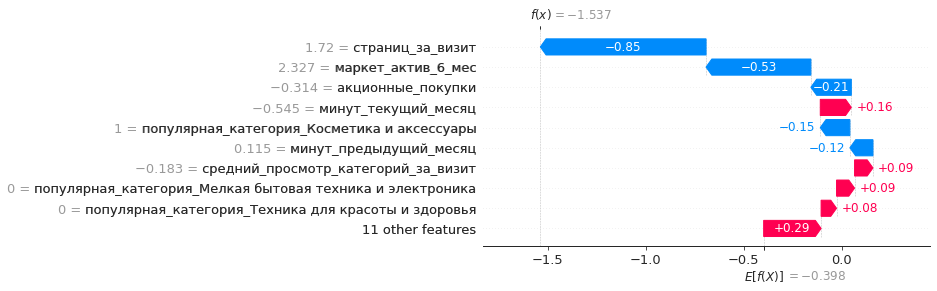

-------------------------------------------------------------------------------------------------------------------------------
Index: 27


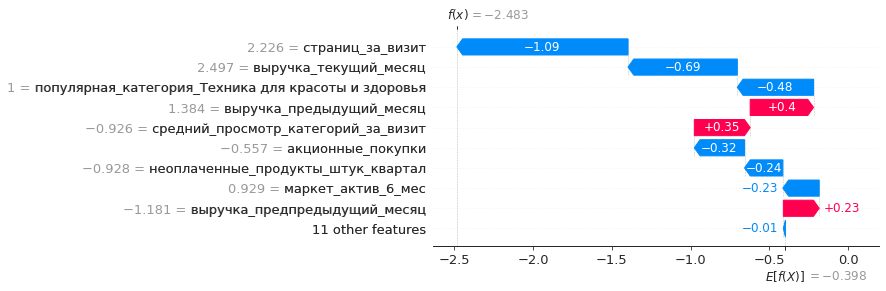

-------------------------------------------------------------------------------------------------------------------------------
Index: 64


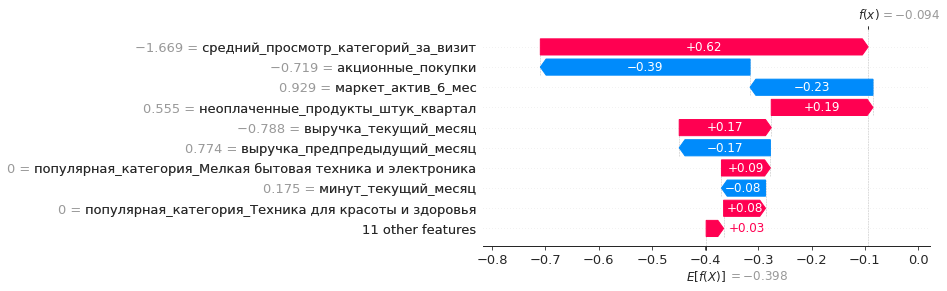

-------------------------------------------------------------------------------------------------------------------------------
Index: 67


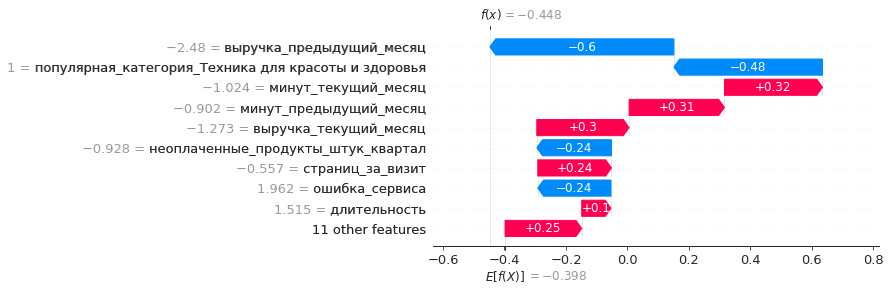

-------------------------------------------------------------------------------------------------------------------------------
Index: 77


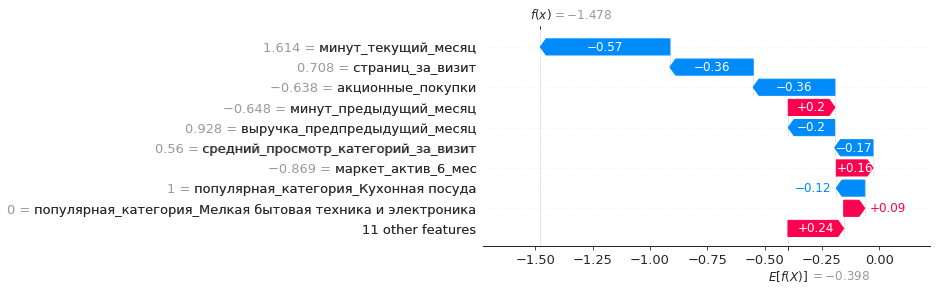

-------------------------------------------------------------------------------------------------------------------------------
Index: 83


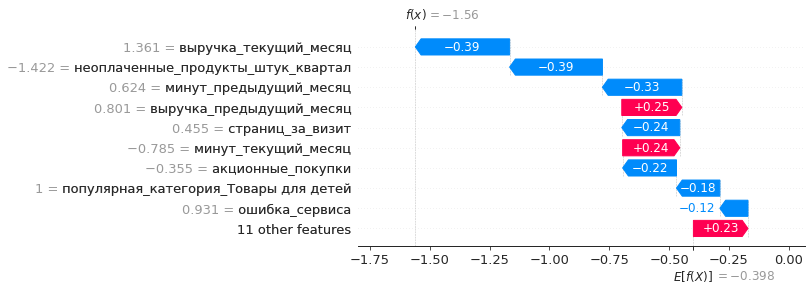

-------------------------------------------------------------------------------------------------------------------------------
Index: 111


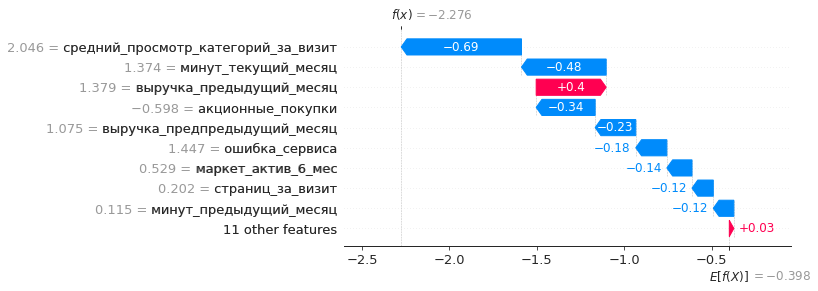

-------------------------------------------------------------------------------------------------------------------------------
Index: 136


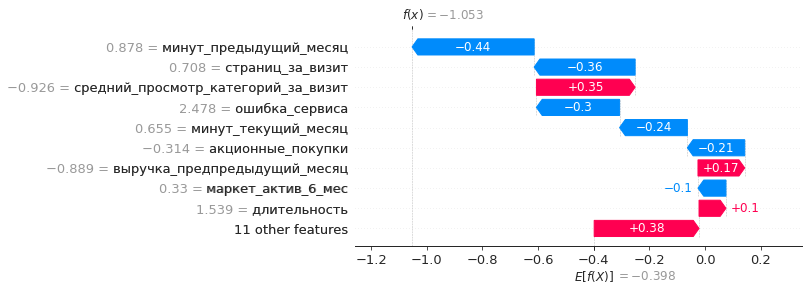

-------------------------------------------------------------------------------------------------------------------------------
Index: 141


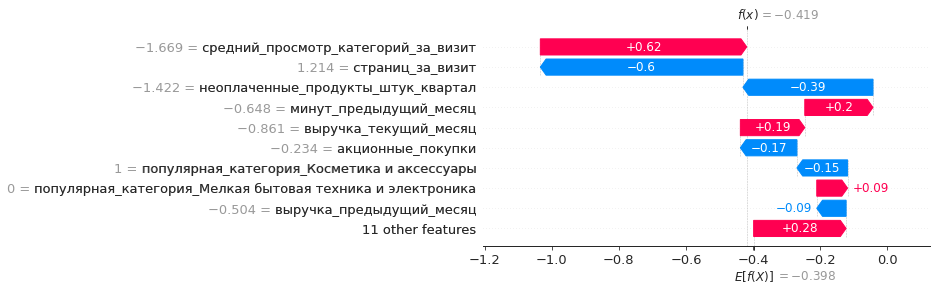

-------------------------------------------------------------------------------------------------------------------------------
Index: 144


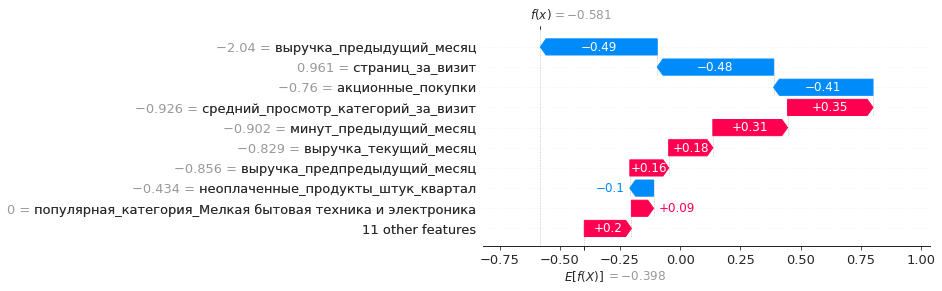

-------------------------------------------------------------------------------------------------------------------------------
Index: 152


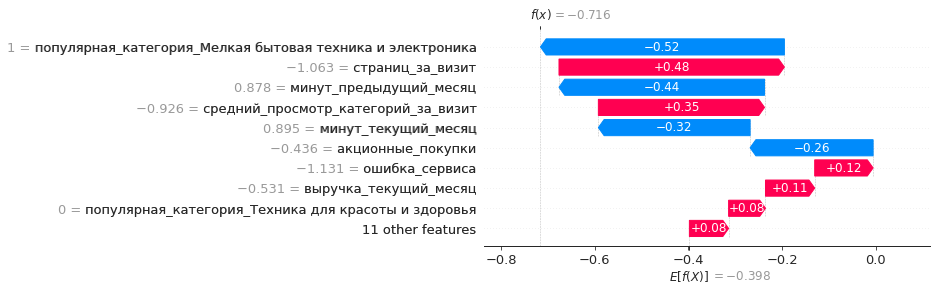

-------------------------------------------------------------------------------------------------------------------------------
Index: 167


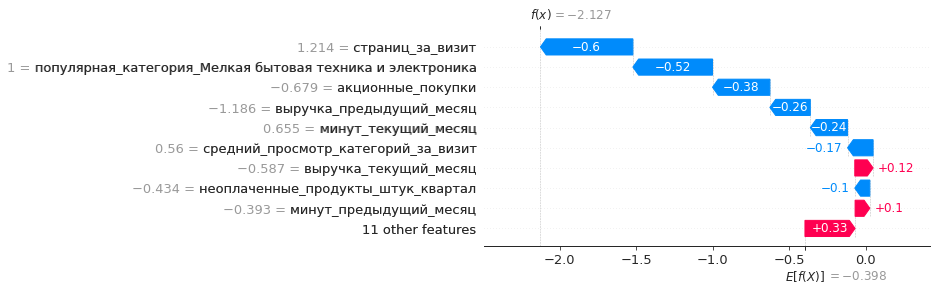

-------------------------------------------------------------------------------------------------------------------------------
Index: 184


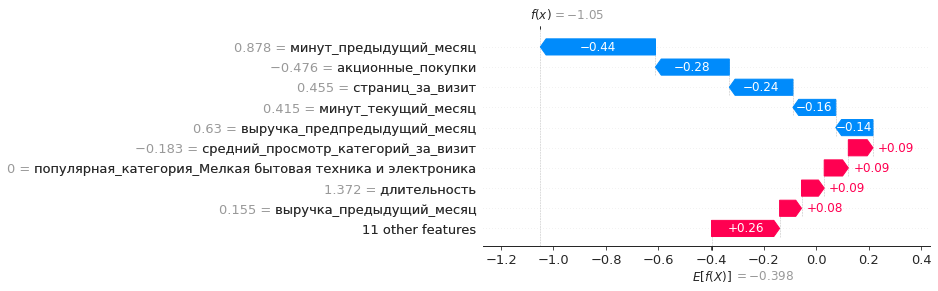

-------------------------------------------------------------------------------------------------------------------------------
Index: 198


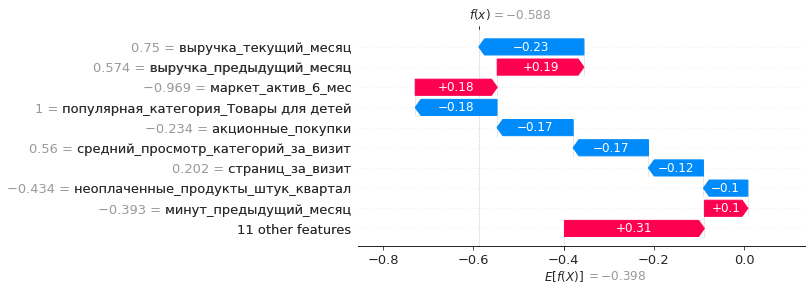

-------------------------------------------------------------------------------------------------------------------------------
Index: 200


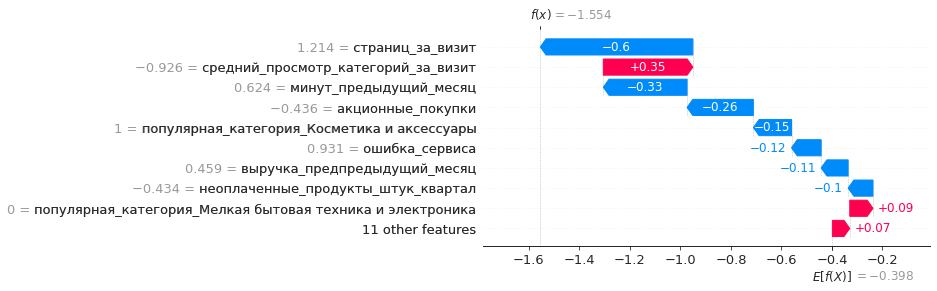

-------------------------------------------------------------------------------------------------------------------------------
Index: 201


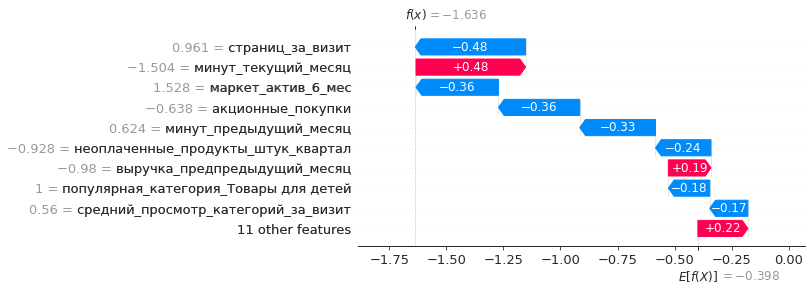

-------------------------------------------------------------------------------------------------------------------------------
Index: 256


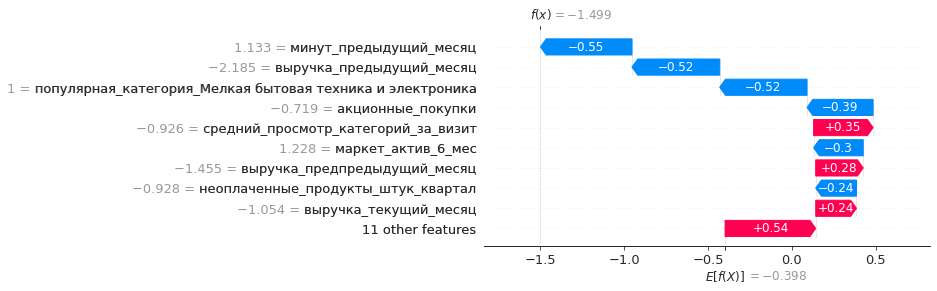

-------------------------------------------------------------------------------------------------------------------------------
Index: 272


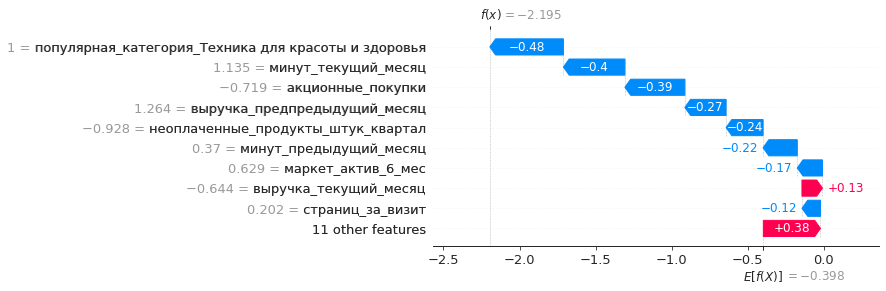

-------------------------------------------------------------------------------------------------------------------------------
Index: 275


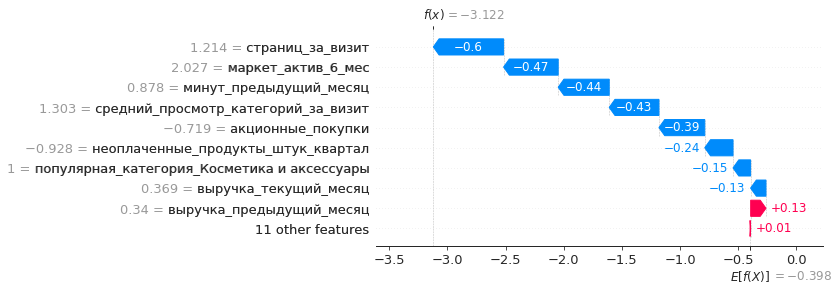

-------------------------------------------------------------------------------------------------------------------------------
Index: 281


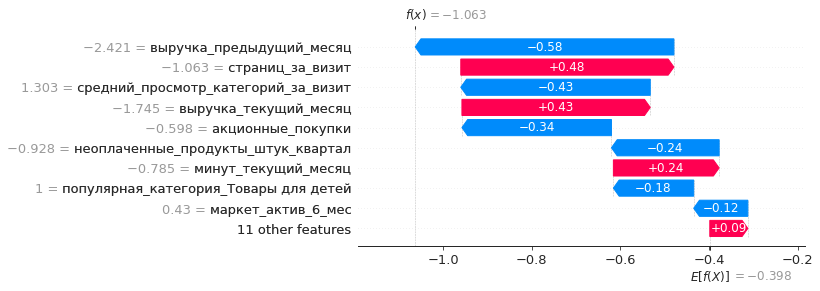

-------------------------------------------------------------------------------------------------------------------------------
Index: 297


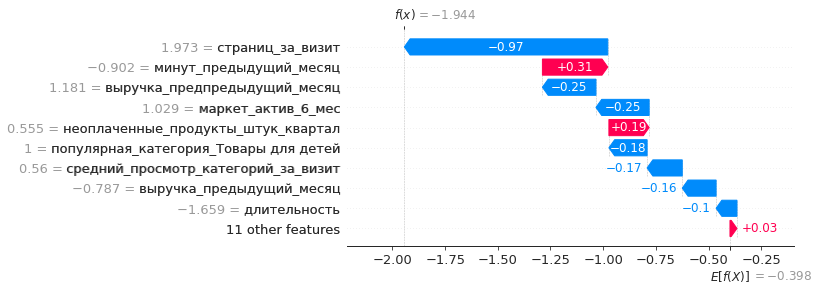

-------------------------------------------------------------------------------------------------------------------------------
Index: 314


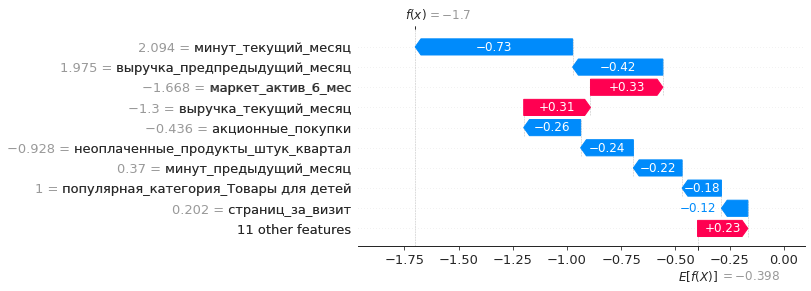

-------------------------------------------------------------------------------------------------------------------------------
Index: 317


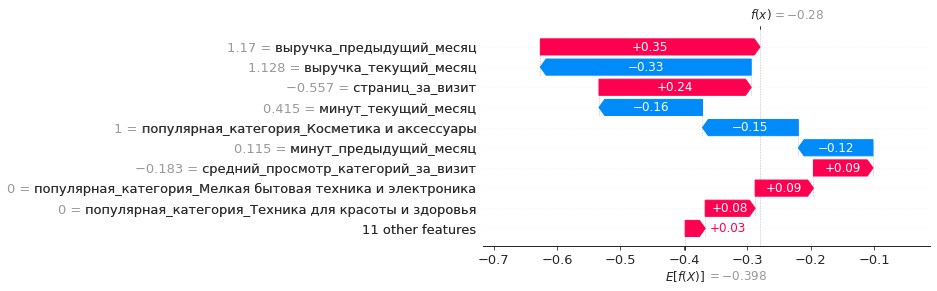

-------------------------------------------------------------------------------------------------------------------------------


In [74]:
# в отдельную переменную сохраняем индексы ошибочно присвоенных классов 0
indexes_one = X_test_final.index[(X_test_final['y_test']==1) & (X_test_final['y_pred']==0)].tolist()

# через цикл визуализируем вклады признаков для каждого объекта
for i in indexes_one:
    print('Index:', i)
    fig = plt.figure()
    shap.plots.waterfall(shap_values[i], show=False)
    plt.gcf().set_size_inches(8, 4)
    plt.show()
    print(line_1)

Index: 96


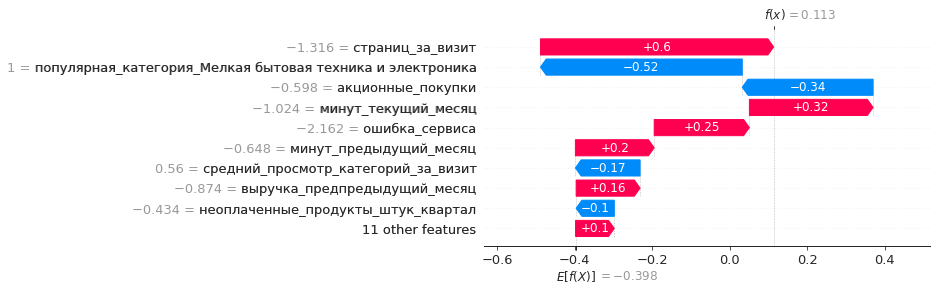

-------------------------------------------------------------------------------------------------------------------------------
Index: 216


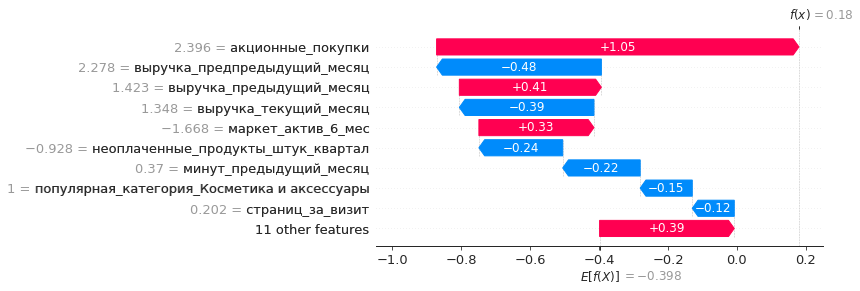

-------------------------------------------------------------------------------------------------------------------------------
Index: 277


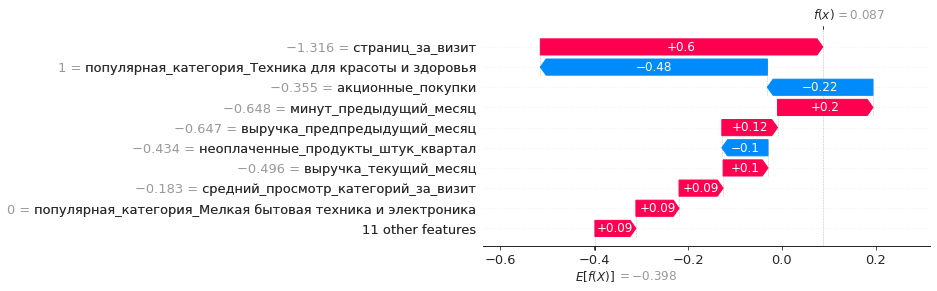

-------------------------------------------------------------------------------------------------------------------------------


In [75]:
# в отдельную переменную сохраняем индексы ошибочно присвоенных классов 1
indexes_two = X_test_final.index[(X_test_final['y_test']==0) & (X_test_final['y_pred']==1)].tolist()

# через цикл визуализируем вклады признаков для каждого объекта
for i in indexes_two:
    print('Index:', i)
    fig = plt.figure()
    shap.plots.waterfall(shap_values[i], show=False)
    plt.gcf().set_size_inches(8, 4)
    plt.show()
    print(line_1)

### Вывод анализу важности признаков:

* **Самые  мало значимые признаки для модели:**
    * *популярная_категория_Косметика и аксессуары*
    * *тип_сервиса*
    * *популярная_категория_Кухонная посуда*
    * *разрешить_сообщать*
    * *маркет_актив_тек_мес*
    

* **Признаки, сильнее всего влияюшие на целевой признак:**
    * *страниц_за_визит*
    * *акционные_покупки*
    * *минут_предыдущий_месяц*
    * *средний_просмотр_категорий_за_визит*
    * *минут_текущий_месяц*


* **При моделировании и принятии бизнес-решений следует учесть:**
    * что на покупателей и их покупательскую активность оказывает ощутимое влияние наличие акционных предложений, возможно объём таких предложений стоит расширить. Причем, исходя из жизненного опыта, не всегда важен размер скидки, сколько сам факт её наличия. Предложение со скидкой всегда привлекает внимание.
    * что чем дольше покупатель находится на сайте и чем больше страниц просматривает, тем выше вероятность, что он совершит покупку.

---

## Шаг 8. Сегментация покупателей

**В первую очередь объединим датафреймы и добавим прогнозы лучшей модели**

In [76]:
# принадлежности кклассам для тренировочной выборки
clf_best_probas_train = clf_best.predict_proba(X_train_final)[:,1]

# предсказания для тренировочной выборки
X_pred = clf_best.predict(X_train_final)

# объединяем выборки
total_train = pd.concat([X_train, y_train], axis=1)
total_test = pd.concat([X_test, y_test], axis=1)

# добавялем столбцы с прогнозами
total_train['probas'] = clf_best_probas_train.tolist()
total_train['класс_прогноз'] = X_pred.tolist()
total_test['probas'] = clf_best_probas.tolist()
total_test['класс_прогноз'] = y_pred.tolist()

# объединяем и добавялем столбец 'id'
final_df = pd.concat([total_train, total_test])
final_df = pd.merge(final_df, df_merged_final['id'], left_index=True, right_index=True)

# с помощью собственной функции преобразуем числовые значения 'покупательская_активность' в категориальные
# 1 преобразуем в 'Снизилась' 
# 0 преобразуем в 'Прежний уровень'

# перезапишем столбец 'покупательская_активность' с помощью функции to_cat_func
final_df['покупательская_активность'] = final_df['покупательская_активность'].apply(to_cat_func)

# таким же образом преобразуем числовые значения столбца 'класс_прогноз'
# но немного изменим значения
cat_value_one = 'Снизится'
cat_value_two = 'Не изменится'
final_df['класс_прогноз'] = final_df['класс_прогноз'].apply(to_cat_func)

# переименовываем для удобства столбец 'класс_прогноз'
final_df = final_df.rename(columns={'класс_прогноз': 'прогноз_покуп_актив'})

# добавялем данные о прибыльности
final_df = final_df.merge(df_money, on='id')

# проверяем, выведем на экран размерность и первые 5 строк
print('Размерность:', final_df.shape)
final_df.head()

Размерность: (1296, 21)


тип_сервиса разрешить_сообщать  маркет_актив_6_мес  маркет_актив_тек_мес  \
0    стандарт                 да                 5.5                     4   
1    стандарт                 да                 5.1                     4   
2    стандарт                 да                 4.3                     5   
3    стандарт                 да                 5.6                     4   
4     премиум                 да                 3.6                     5   

   длительность  акционные_покупки                  популярная_категория  \
0           510               0.15  Мелкая бытовая техника и электроника   
1           199               0.23        Техника для красоты и здоровья   
2           997               0.17  Мелкая бытовая техника и электроника   
3           342               0.94                       Кухонная посуда   
4           873               0.39                      Товары для детей   

   средний_просмотр_категорий_за_визит  неоплаченные_продукты_штук_квартал  \
0                                    2                                   4   
1                                    4                                   5   
2                                    5                                   1   
3                                    2                                   7   
4                                    3                                   2   

   ошибка_сервиса  страниц_за_визит  выручка_текущий_месяц  \
0               7                16                 6014.2   
1               2                 3                 3789.7   
2               3                11                 3798.4   
3               5                 8                 4766.2   
4               2                 5                 4600.0   

   выручка_предыдущий_месяц  выручка_предпредыдущий_месяц  \
0                    5170.5                        4347.0   
1                    6400.0                        4597.0   
2                    4113.0                        4626.0   
3                    4930.0                        5269.0   
4                    3716.0                        4691.0   

   минут_текущий_месяц  минут_предыдущий_месяц покупательская_активность  \
0                    6                      20           Прежний уровень   
1                   13                      11                 Снизилась   
2                   10                      13           Прежний уровень   
3                   19                      14           Прежний уровень   
4                   10                      10                 Снизилась   

     probas прогноз_покуп_актив      id  прибыль  
0  0.057128        Не изменится  215858     4.37  
1  0.826820            Снизится  215361     4.03  
2  0.116939        Не изменится  215884     4.37  
3  0.746024            Снизится  216564     5.58  
4  0.780191            Снизится  215715     4.87

***Объединение датафреймов и добавление прогнозов прошло корректно.***

---
**Переходим к выбору сегмента для анализа**

**Выбранный сегмент:** 
* покупатели с высокой прибыльностью **(>5)** 
* и высокой вероятностью снижения покупательской активности **(>0.7)**

In [77]:
# с помощью собственной функции добавим новый столбец с вероятность снижения покупательской активности 
# исходя из выбранного порога в 0.7
def segment(data):
    try:
        if data > 0.7:
            return 'Выс. вероятность снижения'
        if data < 0.7:
            return 'Низ. вероятность снижения'
    except:
        return 'Error'
    
final_df['прогноз_покуп_активности'] = final_df['probas'].apply(segment)

# сохраянем выбранный сегмент в отдельную переменную
selected_segment = final_df[(final_df['прибыль'] > 5) & (final_df['probas'] > 0.7)]

# также в отедльную переменную сохраним покупателей с низкой вероятностью снижения активности
selected_segment_good = final_df[(final_df['прибыль'] > 5) & (final_df['probas'] < 0.7)]

print('Количество покупателей выбранного сегмента:', selected_segment['id'].count())

# переименовываем столбец 'разрешить_сообщать' (делаем название короче)
# и выводим сегмент на экран, предварительно выбрав важные для анализа столбцы
# и отсортировав по уменьшению показателя прибыльности
selected_segment = selected_segment.rename(columns={'разрешить_сообщать': 'рассылка'})

selected_segment.sort_values(by='прибыль', ascending=False)[['id', 
                                                             'прибыль',
                                                             'probas',
                                                             'прогноз_покуп_активности', 
                                                             'страниц_за_визит', 
                                                             'акционные_покупки', 
                                                             'популярная_категория', 
                                                             'тип_сервиса',
                                                             'рассылка']]

Количество покупателей выбранного сегмента: 55


id  прибыль    probas   прогноз_покуп_активности  страниц_за_визит  \
316   215401     7.43  0.891430  Выс. вероятность снижения                 4   
1105  215563     6.88  0.787834  Выс. вероятность снижения                 7   
902   215400     6.73  0.987773  Выс. вероятность снижения                 2   
503   215561     6.59  0.974847  Выс. вероятность снижения                 3   
1202  215505     6.55  0.912637  Выс. вероятность снижения                 3   
104   215439     6.33  0.706601  Выс. вероятность снижения                 7   
848   215368     6.27  0.862182  Выс. вероятность снижения                 1   
120   215494     6.12  0.894082  Выс. вероятность снижения                 3   
490   215613     5.99  0.934099  Выс. вероятность снижения                 4   
149   215456     5.83  0.872728  Выс. вероятность снижения                 5   
539   215555     5.79  0.980286  Выс. вероятность снижения                 2   
173   215639     5.74  0.925317  Выс. вероятность снижения                 4   
566   215649     5.71  0.941855  Выс. вероятность снижения                 3   
993   215484     5.64  0.921268  Выс. вероятность снижения                 3   
355   215425     5.64  0.921896  Выс. вероятность снижения                 4   
482   215449     5.64  0.960659  Выс. вероятность снижения                 3   
1167  215643     5.59  0.937544  Выс. вероятность снижения                 6   
3     216564     5.58  0.746024  Выс. вероятность снижения                 8   
710   215519     5.56  0.978058  Выс. вероятность снижения                 4   
411   215568     5.49  0.722340  Выс. вероятность снижения                 3   
536   215391     5.44  0.909955  Выс. вероятность снижения                 1   
702   215557     5.44  0.755343  Выс. вероятность снижения                 6   
608   215485     5.41  0.955782  Выс. вероятность снижения                 7   
664   215658     5.40  0.908928  Выс. вероятность снижения                 2   
833   215413     5.40  0.911939  Выс. вероятность снижения                 5   
506   215927     5.35  0.780099  Выс. вероятность снижения                 9   
1206  215608     5.35  0.924072  Выс. вероятность снижения                 5   
286   216371     5.35  0.822081  Выс. вероятность снижения                 9   
366   215931     5.33  0.710188  Выс. вероятность снижения                 7   
495   215591     5.31  0.850425  Выс. вероятность снижения                 2   
1090  215832     5.30  0.899209  Выс. вероятность снижения                 4   
955   215719     5.28  0.944113  Выс. вероятность снижения                 4   
1081  215908     5.26  0.826226  Выс. вероятность снижения                 5   
496   215570     5.25  0.768296  Выс. вероятность снижения                 6   
794   215738     5.25  0.915806  Выс. вероятность снижения                 2   
532   215503     5.23  0.994357  Выс. вероятность снижения                 1   
200   215459     5.16  0.980275  Выс. вероятность снижения                 6   
268   215388     5.16  0.977514  Выс. вероятность снижения                 2   
1275  215651     5.15  0.952165  Выс. вероятность снижения                 5   
1223  215640     5.14  0.921151  Выс. вероятность снижения                 5   
288   215607     5.12  0.989291  Выс. вероятность снижения                 8   
171   215619     5.12  0.862392  Выс. вероятность снижения                 3   
644   215698     5.10  0.987309  Выс. вероятность снижения                 3   
1194  215745     5.10  0.893244  Выс. вероятность снижения                 6   
71    215396     5.09  0.814531  Выс. вероятность снижения                 4   
703   215743     5.07  0.974046  Выс. вероятность снижения                 3   
658   215725     5.06  0.859320  Выс. вероятность снижения                 5   
1118  215582     5.06  0.762878  Выс. вероятность снижения                 3   
1263  215701     5.05  0.997327  Выс. вероятность снижения                 2   
887   2155

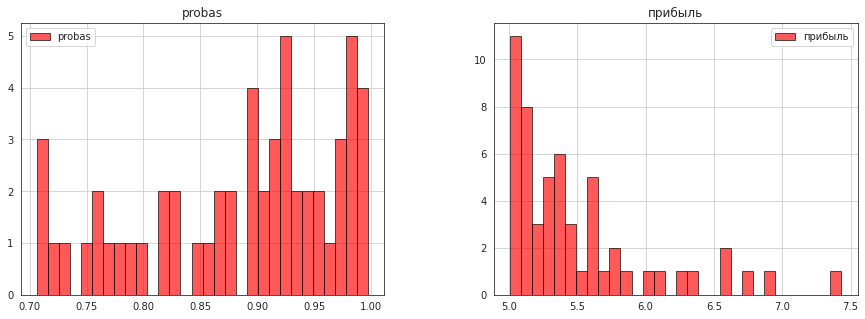

In [78]:
# Изучим распределения вероятности снижения покупательской активности и прибыльности для выбранного сегмента
selected_segment[['probas', 'прибыль']].hist(bins=30, ec='black', lw=1, alpha=0.65, legend=True, figsize=(15, 5), color='r');

---
* ***Видим, что у многих покупателей выбранного сегмента вероятность принадлежности к классу 1 (снижение) даже выше 0.9, что говорит об очень высокой вероятности снижения их покупательской активности вплоть до её сведения к нулю, то есть ухода к конкурентам***


* ***Касаемо прибыльности можно сказать, что у большинства покупателей показатель прибыльности до 0.6, но встречаются и покупатели с весьма высокой прибыльностью (выше 6.5). Это учитывая, что максимальный показатель прибыльности в приницпе составляет 7.43 для всех покупателей заказчика***

Снижение покупательской активности (количество покупателей)
Низкая вероятность: 151
Высокая вероятность: 55
-------------------------------------------------------------------------------------------------------------------------------


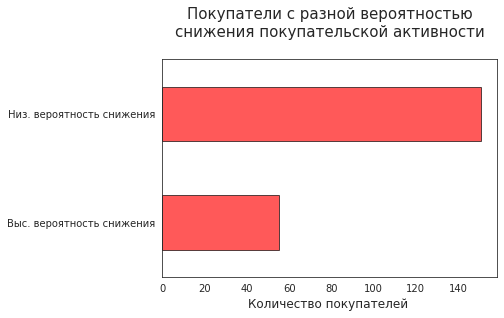

-------------------------------------------------------------------------------------------------------------------------------


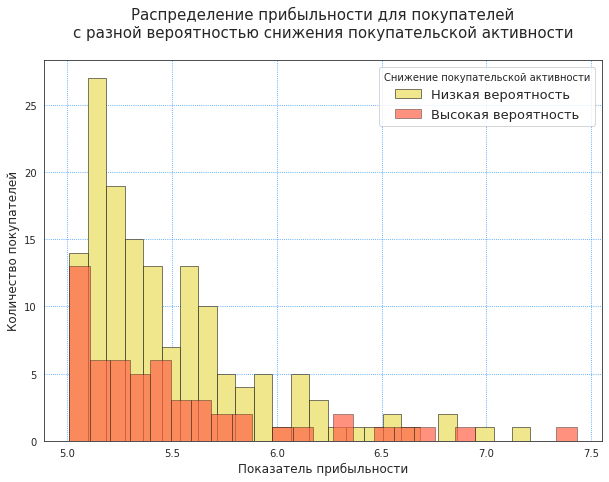

In [79]:
# выведем на экран количество покупателей с разными вероятностями снижения активности
print('Снижение покупательской активности (количество покупателей)')
print('Низкая вероятность:', selected_segment_good['id'].count())
print('Высокая вероятность:', selected_segment['id'].count())
print(line_1)

# визуализируем на графике
(final_df[(final_df['прибыль'] > 5)]['прогноз_покуп_активности']
 .value_counts(ascending=True)
 .plot(kind='barh', color='r', ec='black', lw=1, alpha=0.65))
plt.title('Покупатели с разной вероятностью\nснижения покупательской активности\n', size=15)
plt.xlabel('Количество покупателей ', size=12)
plt.show()
print(line_1)

# построим двойную гистограмму для прибыльности покупателей
# с низкой и высокой вероятностью снижения покупательской активности
ax = selected_segment_good['прибыль'].plot(
    kind='hist',
    histtype='bar',
    bins=25,
    linewidth=5,
    label='raw',
    figsize=(10,7),
    ec='black',
    lw=0.5,
    alpha=1,
    facecolor='khaki')

selected_segment['прибыль'].plot(
    kind='hist',
    histtype='bar',
    bins=25,
    linewidth=5,
    ax=ax,
    grid=False,
    figsize=(10, 7),
    ec='black',
    lw=0.5,
    alpha=0.7,
    facecolor='tomato')
plt.grid(linestyle='dotted', color='dodgerblue')
plt.title('Распределение прибыльности для покупателей\nс разной вероятностью снижения покупательской активности\n', size=15)
plt.xlabel('Показатель прибыльности', size=12)
plt.ylabel('Количество покупателей', size=12)
plt.legend(['Низкая вероятность',
            'Высокая вероятность'], prop={'size': 13}, title='Снижение покупательской активности')
plt.show()

---
***Учитывая соотношение покупателей с низкой и высокой вероятностью снижения покупательской активности (151 к 55) и исходя из распределения прибыльности для данных покупателей по отдельности можно сказать, что прибыльность покупателей с высокой вероятностью снижения покупательской активности сопоставима с покупателями с низкой вероятностью.***

***То есть покупатели с высокой вероятность снижения покупательской активности с точки зрения прибыльности так же важны как и остальные. Мероприятия по их удержанию и повышению покупательской активности будут более чем оправданы, так как маржинальность их покупок такая же как у остальных покупателей, а в отдельных случаях даже выше.***

In [80]:
# посмотрим на отношение покупателей выбранного сегмента к рассылкам
print('Разрешение на рекламные рассылки в выбранном сегменте:')
print(selected_segment['рассылка'].value_counts())

Разрешение на рекламные рассылки в выбранном сегменте:
да     38
нет    17
Name: рассылка, dtype: int64


---
***Почти 70% покупателей сегмента лояльно относятся (а может даже и испытывают потребность) к информационным и рекламным рассылкам. Это плюс.***

Популярные категории в выбранном сегменте:
Товары для детей                        16
Косметика и аксессуары                  15
Кухонная посуда                          8
Домашний текстиль                        8
Техника для красоты и здоровья           6
Мелкая бытовая техника и электроника     2
Name: популярная_категория, dtype: int64
-------------------------------------------------------------------------------------------------------------------------------
Типы сервиса в выбранном сегменте:
стандарт    31
премиум     24
Name: тип_сервиса, dtype: int64
-------------------------------------------------------------------------------------------------------------------------------


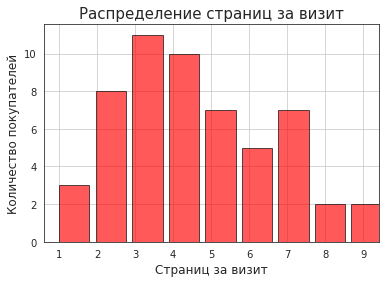

-------------------------------------------------------------------------------------------------------------------------------


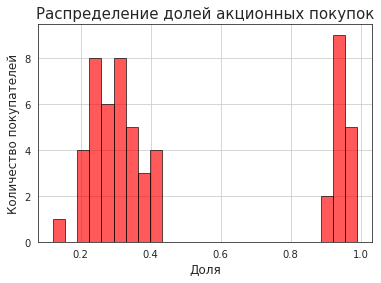

In [81]:
# изуучим в выбранном сегменте популярные категории и типы сервиса
print('Популярные категории в выбранном сегменте:')
print(selected_segment['популярная_категория'].value_counts())
print(line_1)
print('Типы сервиса в выбранном сегменте:')
print(selected_segment['тип_сервиса'].value_counts())
print(line_1)

# изуучим в выбранном сегменте распределение страниц за визит
selected_segment['страниц_за_визит'].hist(bins=25, color='r', ec='black', lw=1, alpha=0.65, width=0.8)
plt.title('Распределение страниц за визит', size=15)
plt.xlabel('Страниц за визит', size=12)
plt.ylabel('Количество покупателей', size=12)
plt.show()
print(line_1)

# изуучим в выбранном сегменте распределение долей акционных покупок
selected_segment['акционные_покупки'].hist(bins=25, color='r', ec='black', lw=1, alpha=0.65)
plt.title('Распределение долей акционных покупок', size=15)
plt.xlabel('Доля', size=12)
plt.ylabel('Количество покупателей', size=12)
plt.show()

---
***Есть интересная подкатегория покупателей, склонных к акционным покупкам (доля выше 0.8)***

***Изучим их подробнее.***

Количество покупателей с долей акционных покупок выше 80%: 16
-------------------------------------------------------------------------------------------------------------------------------
Их отношение к рассылкам:
да     11
нет     5
Name: рассылка, dtype: int64
-------------------------------------------------------------------------------------------------------------------------------
Самые популярные категории покупателей с долей акционных покупок выше 80%:
Кухонная посуда                         4
Товары для детей                        4
Домашний текстиль                       3
Косметика и аксессуары                  2
Техника для красоты и здоровья          2
Мелкая бытовая техника и электроника    1
Name: популярная_категория, dtype: int64
-------------------------------------------------------------------------------------------------------------------------------
Типы сервиса покупателей с долей акционных покупок выше 80%:
стандарт    13
премиум      3
Name: тип_сервиса, d

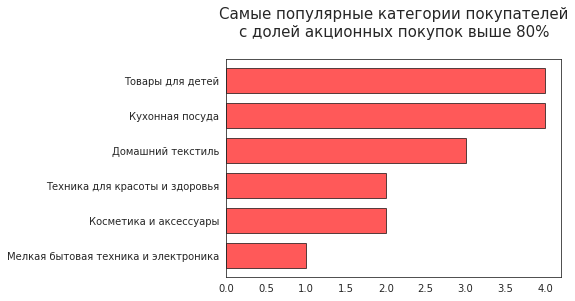

-------------------------------------------------------------------------------------------------------------------------------


In [82]:
# изучим покупателей, склонных совершать в основном акционные покупки
print('Количество покупателей с долей акционных покупок выше 80%:', 
      selected_segment[selected_segment['акционные_покупки'] > 0.8]['id'].count())
print(line_1)

print('Их отношение к рассылкам:')
print(selected_segment[selected_segment['акционные_покупки'] > 0.8]['рассылка'].value_counts())
print(line_1)

print('Самые популярные категории покупателей с долей акционных покупок выше 80%:')
print(selected_segment[selected_segment['акционные_покупки'] > 0.8]['популярная_категория'].value_counts())
print(line_1)
print('Типы сервиса покупателей с долей акционных покупок выше 80%:')
print(selected_segment[selected_segment['акционные_покупки'] > 0.8]['тип_сервиса'].value_counts())
print(line_1)

(selected_segment[selected_segment['акционные_покупки'] > 0.8]['популярная_категория']
 .value_counts(ascending=True)
 .plot(kind='barh', color='r', ec='black', lw=1, alpha=0.65, width=0.7))
plt.title('Самые популярные категории покупателей\nс долей акционных покупок выше 80%\n', size=15)
plt.show()
print(line_1)

### Вывод по сегментации покупателей:

1. Объединили датафреймы, добавили прогнозы и данные о прибыльности
3. Выбрали сегмент для анализа:
    * *покупатели с высокой прибыльностью* ***(>5)*** 
    * *и высокой вероятностью снижения покупательской активности* ***(>0.7)***
3. Изучили распределение прибыльности в выбранном сегменте
4. Сравнили прибыльность выбранного сегмента (высокая вероятность снижения покупательской активности) с прибыльностью покупателей с низкой вероятностью снижения покупательской активности
5. Изучили внутри выбранного сегмента:
    * отношение к рассылкам
    * популярные категори покупок
    * типы сервиса
6. Более детально изучили покупателей с высокой **(>0.8)** долей акционных покупок

---
**Предложения по увеличению покупательской активности для выбранного сегмента:**

Имеем **55** покупателей с высокой прибыльностью и высокой вероятностью снижения покупательской активности.  
Из них **38** покупателей **(почти 70%)** сегмента лояльно относятся к информационным и рекламным рассылкам.

Для её увеличения либо поддержания на прежнем уровне можно предложить:
* **16** покупателей имеют высокую (>80%) ежемесячную долю акционных покупок. То есть спрос этих покупателей эластичен по отношению к цене товара. Более того, **11** из них дали согласие на получение рекламных сообщений.
    * **Можно предложить данным пользователям промокоды на скидки на товары тех категорий, которые они предпочитают, исходя из данных за прошлые месяцы**
        * *Кухонная посуда -* ***4*** *покупателя*
        * *Товары для детей -* ***4*** *покупателя*
        * *Домашний текстиль -* ***3*** *покупателя*
        * *Техника для красоты и здоровья -* ***2*** *покупателя*
        * *Косметика и аксессуары -* ***2*** *покупателя*
        * *Мелкая бытовая техника и электроника -* ***1*** *покупатель*


* Более **20** покупателекй в среднем за визит просматривают **3-4** страницы. 
    * **Возможно стоит попробовать затянуть их глубже в сайт, сделать так, чтобы они просматривали больше страниц. Больше страниц - больше контактов с сайтом, а значит и больше вероятность совершения покупки**
    * **Стоит рассмотреть возможность создания всплывающих окон с предложениями для покупки, исходя из персональных предпочтений**


*  В нашем сегементе **31** покупателей с типом сервиса **стандарт** и **24** - **премиум**. 
    * **Премиальным пользователям предлагаю сделать скидку "постоянного клиента" на премиум обслуживание на три месяца** 
    * **А пользователям со стандартным обслуживанием предлагаю сделать выгодное предложение на переход на премиум. Допустим скидку 50% на премиум обслуживание на три месяца при условии единовременной оплаты за весь период**
     

* В нашем сегементе **15** покупателей предпочтиают категорию **Косметика и аксессуары** и **16** - **Товары для детей**. Суммарно это состоавляет около **56%** от всего сегмента. 
    * **Стоит предложить этим покупателям скидки на данные категории** 
    * **Или чаще предлагать эти категории данным пользователям во время их визита на сайт**       

---

## Шаг 9. Общий вывод

**Поставленная задача:**
* Подготовить имеющиеся данные для обучения
* Разработать  модель, которая предскажет вероятность снижения покупательской активности 
* Выделить сегмент покупателей и разработать персонализированные предложения, чтобы увеличить их покупательскую активность
    
---
**Исходные данные и проведённая предобработка**

***Исходные данные:***
* **`market_file.csv`** *- данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении*
* **`market_money.csv`** *- данные о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом*
* **`markt_time.csv`** *- данные о времени (в минутах), которое покупатель провёл на сайте в течение периода*
* **`money.csv`** *- данные о среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю*

***Проведённая предобработка:***
* Датафреймы **`df_market_file`**, **`df_market_money`**, **`df_market_time`** и **`df_money`** были проверены:
    * на наличие пропусков в данных
    * на соответсвие данных своему типу
    * на наличие явных и неявных дубликатов
    
    
* В результате проверки:
    * пропуски в данных обнаружены не были;
    * типы данных во всех четырёх датафреймах корректны;
    * явные дубликаты в имеющихся датафреймах отсутствуют;
    * в датафрейме **`df_market_file`** были устранены неявные дубликаты в столбце **`тип_сервиса`**;
    * в остальных датафреймах неявные дубликаты обнаружены не были.

---
**Для поиска лучшей модели:**
* был проведён корреляционный анализ всех признаков с целевым


* был подготовлен объединённый датафрейм для моделирования 


* данные были разделены на выборки с учётом стратифакации, так как был обнаружен дисбаланс классов


* для выбора лучшей комбинации модели и гиперпараметров был создан пайплайн, в который вошли модели: 
    * **`DecisionTreeClassifier()`** с гиперпараметрами:
        * **max_depth** от **2 до 4** включительно
        * **max_features** от **2 до 4** включительно
    * **`KNeighborsClassifier()`** с гиперпараметром:
        * **n_neighbors** от **2 до 4** включительно
    * **`LogisticRegression()`**:
        * с *решателем* **solver='liblinear'** и *лассо-регуляризацией* с гиперпараметром:
        * **С** от **1 до 4** включительно
    * **`SVC()`**:
        * с линейным ядром **kernel='linear'** с гиперпараметром:
        * перебор «силы» модели для ядра: от **1 до 9** включительно
        
        
* эффективность выбранной модели оценивали метрикой `ROC-AUC` на тренировочной и тестовой выборках. Данная метрика лучше всего подходит для задачи бинарной классификации с несбалансированным целевым признаком.

---
**В результате была выбрана лучшая модель:**

* **SVC(kernel='linear')**
* с «силой» **6** 
* и скалером **StandardScaler()**

Метрика `ROC-AUC` лучшей модели на тринировочной выборке: **0.892**

Метрика `ROC-AUC` лучшей модели на тестовой выборке: **0.899**

---
**Выбранный сегмент для анализа:**
* *покупатели с высокой прибыльностью* ***(>5)*** 
* *и высокой вероятностью снижения покупательской активности* ***(>0.7)***

**Предложения для выбранного сегмента покупателей:**
* *Предложить пользователям, склонным к акционным покупкам, промокоды на скидки на товары тех категорий, которые они предпочитают, исходя из данных за прошлые месяцы*


* *Попробовать затянуть покупателей сегмента глубже в сайт, сделать так, чтобы они просматривали больше страниц. Больше страниц - больше контактов с сайтом, а значит и больше вероятность совершения покупки*


* *Рассмотреть возможность создания всплывающих окон с предложениями для покупки, исходя из персональных предпочтений*


* *Премиальным пользователям предложить скидку "постоянного клиента" на премиум обслуживание на три месяца*


* *Пользователям со стандартным обслуживанием сделать выгодное предложение на переход на премиум-обслуживание*


* *Внутри сегмента предложить покупателям категорий **Косметика и аксессуары** и **Товары для детей** скидки на данные категории*


* *Чаще предлагать эти категории данным пользователям во время их визита на сайт*      

---

---

## Чек-лист готовности проекта

**Оформление введения к проекту**
- [x] Оформлено описание проекта
- [x] Перечислены цели исследования
- [x] Изучены имеющиеся данные
- [x] Перечислены основные этапы исследования
***

**Импорт библиотек и собственные функции**
- [x] Загружены необходимые библиотеки
- [x] Представлены и описаны собственные функции, необходимые для текущего проекта
***

**Шаг 1. Загрузка и обзор данных**
- [x] Загружены необходимые библиотеки
- [x] CSV-файлы с данными считаны с помощью библиотеки pandas и сохранены в датафреймы
    - [x] *`/datasets/market_file.csv`*
    - [x] *`/datasets/market_money.csv`*
    - [x] *`/datasets/market_time.csv`*
    - [x] *`/datasets/money.csv`*
- [x] Изучена общая информация о каждом датафрейме *(`head()`, `shape()`, `info()`, `describe()`, `hist()`)*
- [x] Данные проверены на соответствие описанию
- [x] Есть промежуточные выводы
- [x] Оформлен общий вывод по обзору данных
***

**Шаг 2. Предобработка данных**
- [x] Исправление названий столбцов и прочих ошибок
    - [x] *столбцы переименованы в соответствии со стандартами оформления данных и приведены к единому стилю*
- [x] Датафреймы проверены на наличие пропущенных значений  
- [x] Проверены типы данных в имеющихся датафреймах
- [x] Датафреймы проверены на наличие явных дубликатов (при необходимости дубликаты обработаны) 
- [x] Датафреймы проверены на наличие неявных дубликатов (при необходимости дубликаты обработаны)
- [x] Оформлен общий вывод по предобработке данных
***

**Шаг 3. Исследовательский анализ данных**
- [x] Изучены числовые и категориалные признаки во всех датафреймах
    - [x] *распределения визуализированы с помощью соответствующих графиков* 
    - [x] *по каждому датфрейму сделаны промежуточные выводы*
- [x] Данные проверены на наличие выбросов (выбросы при необходимости устранены)
- [x] Отобраны клиенты с покупательской активностью не менее трёх месяцев (те, которые что-либо покупали в этот период)
- [x] Оформлен общий вывод по исследовательскому анализу данных
***

**Шаг 3. Объединение таблиц**
- [x] Объединены таблицы **`market_file.csv`**, **`market_money.csv`**, **`market_time.csv`**
- [x] Учтено, что данные о выручке и времени на сайте находятся в одном столбце для всех периодов
    - [x] *в итоговой таблице сделан отдельный столбец для каждого периода*
- [x] Оформлен краткий вывод к шагу
***

**Шаг 5. Корреляционный анализ**
- [x] Проведён корреляционный анализ признаков в количественной шкале в итоговой таблице для моделирования
- [x] Сделаны выводы о мультиколлинеарности
    - [x] *при необходимости мультиколлинеарность устранена*
- [x] Оформлен вывод по корреляционному анализу данных
***

**Шаг 6. Использование пайплайнов**
- [x] С помощью пайплайнов применены все изученные модели
    - [x] Во время подготовки данных использован **ColumnTransformer**
        - [x] *количественные и категориальные признаки обработаны в пайплайне раздельно* 
        - [x] *для кодирования категориальных признаков использовано как минимум два кодировщика*
        - [x] *для масштабирования количественных признаков использовано как минимум два скейлера*
    - [x] Обучены четыре модели: **KNeighborsClassifier()**, **DecisionTreeClassifier()**, **LogisticRegression()** и  **SVC()**.
        - [x] *для каждой из них подобран как минимум один гиперпараметр* 
        - [x] *выбрана подходящая для задачи метрика, выбор аргументирован* 
        - [x] *выбранная метрика использована при подборе гиперпараметров*
    - [x] Выбрана лучшая модель, используя заданную метрику. Для этого применена одна из стратегий:
        - [x] *использовать пайплайны и инструменты подбора гиперпараметров для каждой модели отдельно, чтобы выбрать лучшую модель самостоятельно*
        - [x] *использовать один общий пайплайн для всех моделей и инструмент подбора гиперпараметров, который вернёт лучшую модель*
- [x] Оформлен вывод к шагу
***

**Шаг 7. Анализ важности признаков**
- [x] Оценена важность признаков для лучшей модели и построен график важности с помощью метода **SHAP**. 
- [x] Сделаны выводы о значимости признаков:
    - [x] *какие признаки мало значимы для модели*
    - [x] *какие признаки сильнее всего влияют на целевой признак*
    - [x] *как можно использовать эти наблюдения при моделировании и принятии бизнес-решений*
***

**Шаг 8. Сегментация покупателей**
- [x] Выполнена сегментация покупателей
    - [x] *использованы результаты моделирования и данные о прибыльности покупателей*
- [x] Выбрана группа покупателей и предложено, как увеличить её покупательскую активность: 
    - [x] *проведено графическое и аналитическое исследование группы покупателей*
    - [x] *сделаны предложения по работе с сегментом для увеличения покупательской активности*
- [x] Оформлен вывод к шагу
***

**Шаг 9. Общий вывод**
- [x] Оформлен общий вывод исследования:
    - [x] *описана задача*
    - [x] *описаны исходные данные и проведённая предобработка*
    - [x] *указано, что было сделано для поиска лучшей модели*
    - [x] *указана лучшая модель*
    - [x] *добавлены выводы и дополнительные предложения для выбранного сегмента покупателей*
***

- [x]  На каждом этапе есть промежуточные выводы

In [83]:
print('Код не упал! Ура!')

Код не упал! Ура!
